In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./kbo_pitcher_park.csv")

In [4]:
## 결측치 및 전처리 코드
data.isnull().sum()

Name       0
Team       0
Season     0
War        0
G          0
          ..
GB/FB     18
HR/FB%    18
if1B%     30
PPF        0
ESPN       0
Length: 115, dtype: int64

In [5]:
data = data.fillna(0)

In [6]:
data.isnull().sum()

Name      0
Team      0
Season    0
War       0
G         0
         ..
GB/FB     0
HR/FB%    0
if1B%     0
PPF       0
ESPN      0
Length: 115, dtype: int64

In [7]:
normal_sp_data = data[data['GS'] > data['GR']]
normal_cp_data = data[data['GR'] >= data['GS']]

In [12]:
sp_data = data[(data['GS'] > data['GR']) & (data['TBF'] >= 200)]
cp_data = data[(data['GR'] >= data['GS']) & (data['TBF'] >= 100)]
cp2_data = data[(data['GR'] >= data['GS']) & (data['TBF'] >= 50)]

In [13]:
print(len(normal_sp_data), len(normal_cp_data))
print(len(sp_data), len(cp_data), len(cp2_data))

370 1097
275 548 724


In [14]:
sp_data.sort_values(by = 'TBF', ascending = True)

,Name,Team,Season,War,G,GS,GR,GF,CG,SHO,...,GB%,ifFB%,ofFB%,FB%,LD%,GB/FB,HR/FB%,if1B%,PPF,ESPN
934,허윤동,Samsung,20,1.05,11,11,0,0,0,0,...,30.7,8.5,57.5,66.0,3.3,0.5,4.0,7.0,1.0999,1.194679
725,구창모,NC,23,1.87,11,9,2,0,0,0,...,53.4,2.3,39.8,42.1,4.5,1.3,7.1,7.9,1.0191,1.031188
325,육청명,KT,24,0.61,13,10,3,1,0,0,...,40.7,5.6,50.0,55.6,3.7,0.7,6.7,1.9,1.0389,1.054767
19,로니,KIA,22,-0.04,10,9,1,0,0,0,...,57.9,2.1,37.2,39.3,2.8,1.5,12.3,12.8,0.9985,1.016175
231,최원태,LG,23,-0.12,9,9,0,0,0,0,...,43.7,5.3,47.7,53.0,3.3,0.8,6.3,8.5,0.9572,0.879993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,알칸타라,Doosan,20,8.89,31,31,0,1,1,0,...,44.4,7.8,45.1,53.0,2.6,0.8,3.9,5.7,0.9321,0.843788
694,루친스키,NC,22,5.69,31,31,0,0,0,0,...,53.1,4.6,40.8,45.5,1.4,1.2,5.5,8.7,1.0396,1.067985
572,윌커슨,Lotte,24,6.81,32,32,0,1,1,1,...,41.6,8.1,47.3,55.3,3.1,0.8,5.2,7.1,1.0561,1.117267
1069,데스파이네,KT,21,5.95,33,33,0,0,0,0,...,52.9,3.2,39.5,42.7,4.4,1.2,4.1,4.6,1.0023,0.985618


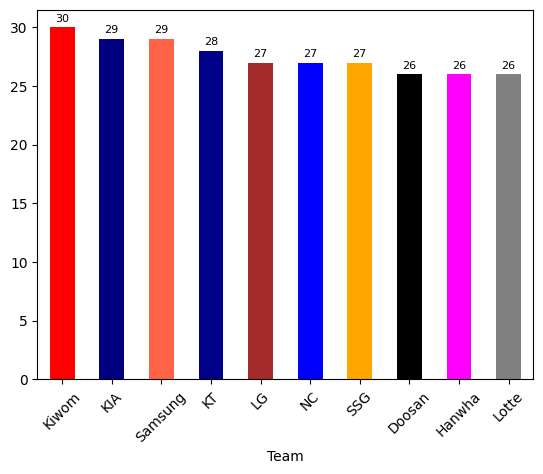

In [15]:
sp_count = sp_data.groupby('Team')
count = sp_count['PPF'].count().sort_values(ascending = False)
colors = ['red', 'navy', 'tomato', 'darkblue', 'brown', 
          'blue', 'orange', 'black', 'magenta', 'gray']
ax = count.plot(kind = 'bar', color = colors[:len(count)])
for i, v in enumerate(count):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=8)
plt.xticks(rotation = 45)
plt.show()

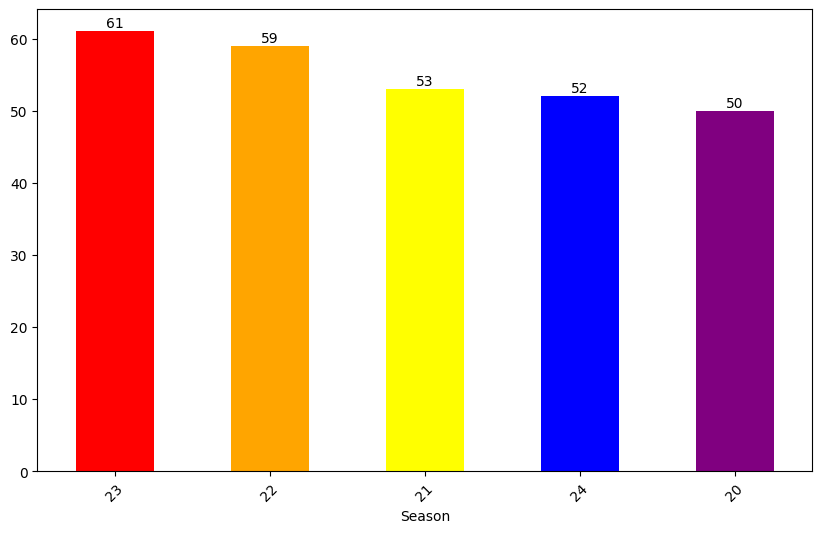

In [16]:
sp_count = sp_data.groupby('Season')
count = sp_count['PPF'].count().sort_values(ascending = False)
colors = ['red', 'orange', 'yellow', 'blue', 'purple']
plt.figure(figsize = (10,6))
ax = count.plot(kind = 'bar', color = colors[:len(count)])
for i, v in enumerate(count):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)
    
plt.xticks(rotation = 45)
plt.show()

In [17]:
name = sp_data['Name']
team = sp_data['Team']
season = sp_data['Season']
PF = sp_data['PPF']
sp_corr = sp_data.drop(columns = ['Name', 'Team', 'Season', 'PPF'], axis = 1)
sp_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 0 to 1443
Columns: 111 entries, War to ESPN
dtypes: float64(76), int64(35)
memory usage: 240.6 KB


In [18]:
corr_without_fip = sp_corr.drop(columns=['FIP']).corr()['ERA-'].abs().sort_values(ascending=False)

# 'ERA'로 시작하는 변수 제외
corr_without_fip = corr_without_fip[~corr_without_fip.index.str.contains('ERA')]
corr_without_war = corr_without_fip[~corr_without_fip.index.str.contains('War')]

# 상위 10개 변수 선택
top_20_features_era = corr_without_war.head(20)
print(top_20_features_era)

rRA9-          0.959925
RA9            0.936260
rRA9pf         0.931544
rRA9           0.925084
WHIP           0.856002
OBP            0.848118
OPS            0.845432
starter waa    0.828499
starter war    0.813037
FIP-           0.787666
LOB            0.777883
IP/GS          0.755078
QS%            0.751236
SLG            0.746857
AVG            0.707854
SD             0.699632
QS             0.692569
K-BB%          0.687654
xFIP           0.657872
W              0.631607
Name: ERA-, dtype: float64


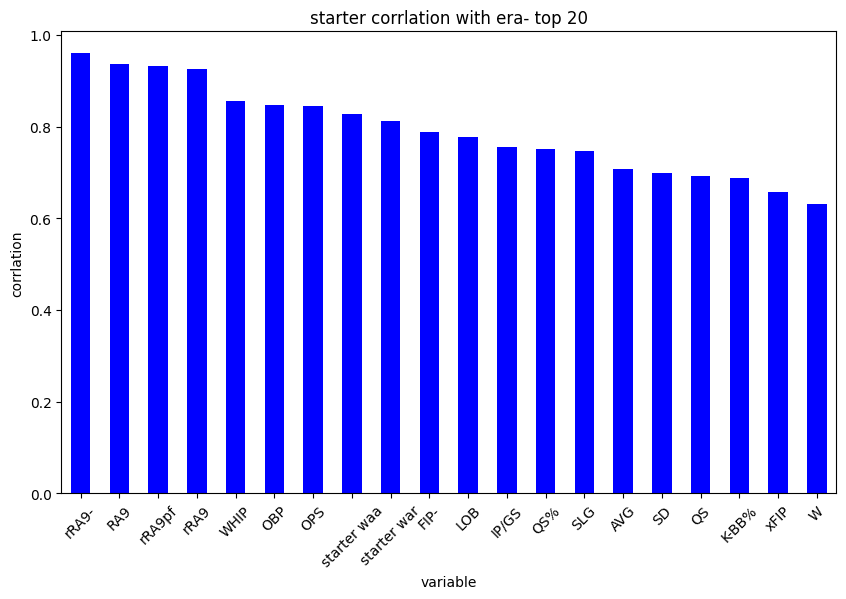

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
top_20_features_era.plot(kind = 'bar', color = 'blue')
plt.title('starter corrlation with era- top 20')
plt.xlabel('variable')
plt.ylabel('corrlation')
# ax = top_20_features_era.plot(kind = 'bar', color = colors[:len(top_20_features_era)])
# for i, v in enumerate(top_20_features_era):
#     ax.text(i, v + 0.5, str(v), ha='center', fontsize=8)
plt.xticks(rotation = 45)
plt.show()

In [20]:
# 'ERA' 변수 제외한 상관계수 계산
corr_without_era = sp_corr.drop(columns=['ERA']).corr()['FIP-'].abs().sort_values(ascending=False)

# 'FIP' 및 'war'가 포함된 변수 제거
corr_filtered = corr_without_era[~corr_without_era.index.str.contains('FIP', case=False)]
corr_filtered = corr_filtered[~corr_filtered.index.str.contains('war', case=False)]

# 상위 20개 변수 선택
top_20_features_fip = corr_filtered.head(20)

# 결과 출력
print(top_20_features_fip)

kwERA          0.863793
K-BB%          0.863513
ERA-           0.787666
rRA9-          0.772593
OPS            0.764432
K/BB           0.753374
rRA9pf         0.751434
OBP            0.751423
RA9            0.750883
QS%            0.744576
IP/GS          0.740056
rRA9           0.738040
WHIP           0.732162
K%             0.731330
starter waa    0.725007
SLG            0.684833
QS             0.676474
SO             0.666806
HR/9           0.656222
SD             0.637255
Name: FIP-, dtype: float64


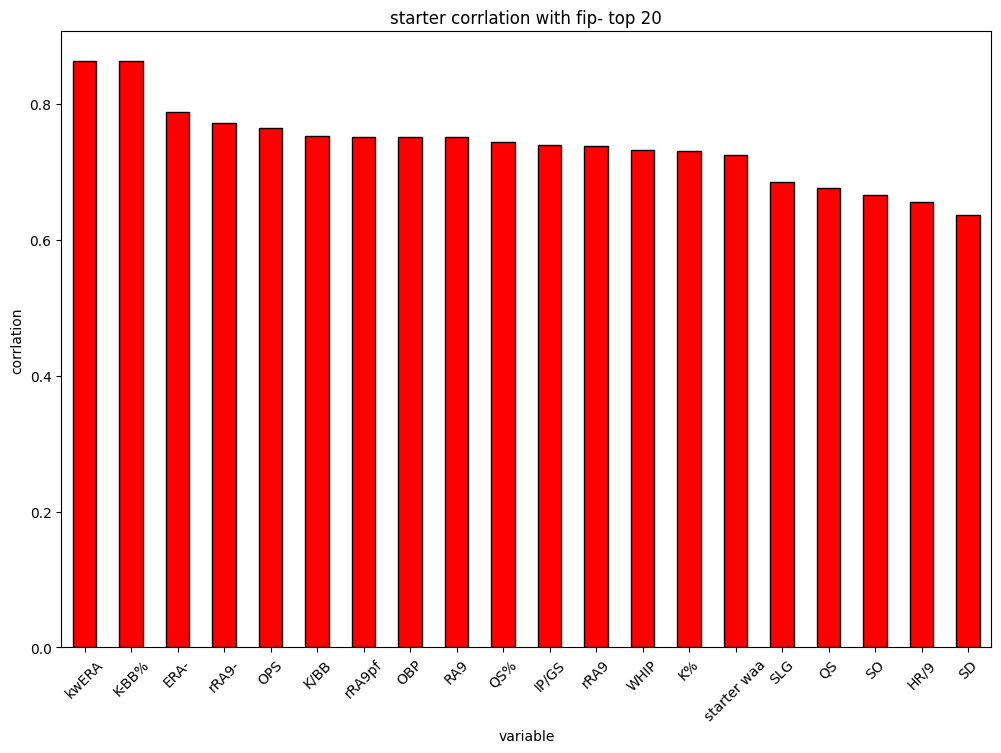

In [21]:
plt.figure(figsize = (12,8))
top_20_features_fip.plot(kind = 'bar', color = 'red', edgecolor = 'black')
plt.title('starter corrlation with fip- top 20')
plt.xlabel('variable')
plt.ylabel('corrlation')
plt.xticks(rotation = 45)
plt.show()

In [22]:
import scipy
from scipy.stats import pearsonr

# 'FIP' 변수와 다른 변수들 간의 상관계수 및 p-value 계산
results = []

for col in sp_corr.columns:
    if col != 'ERA' and not ('ERA' in col or 'war' in col or 'FIP' in col or 'War' in col or 'waa' in col):  # 'ERA'나 'war' 포함된 변수 제외
        corr, p_value = pearsonr(sp_corr['ERA-'], sp_corr[col])
        results.append((col, abs(corr), p_value))  # 절댓값 상관계수 사용
        
# 데이터프레임 변환 및 정렬
corr_era_df = pd.DataFrame(results, columns=['Variable', 'Correlation', 'P_value'])
corr_era_df = corr_era_df[corr_era_df['Correlation'] >= 0.5].sort_values(by='Correlation', ascending=False)

# 결과 출력
print(corr_era_df)

   Variable  Correlation        P_value
39    rRA9-     0.959925  7.668119e-153
26      RA9     0.936260  4.841071e-126
28   rRA9pf     0.931544  5.936734e-122
27     rRA9     0.925084  8.396341e-117
29     WHIP     0.856002   3.364764e-80
41      OBP     0.848118   2.744717e-77
43      OPS     0.845432   2.470934e-76
38      LOB     0.777883   5.150182e-57
65    IP/GS     0.755078   5.662525e-52
49      QS%     0.751236   3.532822e-51
42      SLG     0.746857   2.733071e-50
40      AVG     0.707854   4.129276e-43
80       SD     0.699632   9.552469e-42
48       QS     0.692569   1.304689e-40
36    K-BB%     0.687654   7.697300e-40
6         W     0.631607   5.060471e-32
46     P/IP     0.617100   2.980330e-30
22       SO     0.614835   5.526578e-30
66     P/GS     0.610074   1.990705e-29
32     K/BB     0.603784   1.047206e-28
51     QS+%     0.601360   1.966284e-28
57  start W     0.599241   3.395163e-28
50      QS+     0.597026   5.985605e-28
45      P/G     0.587766   6.106721e-27


C:\Users\user\AppData\Local\Temp\ipykernel_42992\3657604189.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(sp_corr['ERA-'], sp_corr[col])


In [23]:
import pandas as pd
import statsmodels.api as sm

# AIC 계산 함수
def calculate_aic(X, y):
    model = sm.OLS(y, sm.add_constant(X)).fit()
    return model.aic

# 'ERA'를 타겟 변수로 설정
y = sp_corr['ERA-']
candidate_features = corr_era_df['Variable'].tolist()  # 상관계수 0.5 이상의 변수

# 전체 변수로 모델 시작
selected_features = []  # 최종 선택된 변수 리스트
best_aic = float('inf')  # 현재 AIC 값 (최소화할 목표)

while True:
    improved = False
    remaining_features = list(set(candidate_features) - set(selected_features))

    # 1️⃣ **전진 선택 (Forward Selection)**
    aic_with_add = []
    for feature in remaining_features:
        temp_features = selected_features + [feature]
        X_temp = sp_corr[temp_features]
        temp_aic = calculate_aic(X_temp, y)
        aic_with_add.append((feature, temp_aic))

    if aic_with_add:
        min_aic_feature, min_aic = min(aic_with_add, key=lambda x: x[1])
        if min_aic < best_aic:  # AIC 감소하면 추가
            best_aic = min_aic
            selected_features.append(min_aic_feature)
            improved = True

    # 2️⃣ **후진 제거 (Backward Elimination)**
    aic_with_remove = []
    for feature in selected_features:
        temp_features = selected_features.copy()
        temp_features.remove(feature)
        X_temp = sp_corr[temp_features]
        temp_aic = calculate_aic(X_temp, y)
        aic_with_remove.append((feature, temp_aic))

    if aic_with_remove:
        min_aic_feature, min_aic = min(aic_with_remove, key=lambda x: x[1])
        if min_aic < best_aic:  # AIC 감소하면 제거
            best_aic = min_aic
            selected_features.remove(min_aic_feature)
            improved = True

    if not improved:  # 더 이상 AIC 개선이 없으면 종료
        break

# 최적 변수 출력
print("Best AIC:", best_aic)
print("Best Feature Subset:", selected_features)

Best AIC: 1763.3892973707302
Best Feature Subset: ['rRA9-', 'RA9', 'rRA9pf', 'OPS', 'BB/9', 'P/IP', 'RS', 'start W', 'W%', 'IP', 'K%']


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중공선성(VIF) 계산 함수
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# 최적 변수 조합으로 VIF 계산
X_best = sp_corr[list(selected_features)]  # 최적 변수 조합 선택
vif_df = calculate_vif(sm.add_constant(X_best))  # 상수항 포함하여 VIF 계산
# VIF 출력
print("\n### VIF (Variance Inflation Factor) ###")
print(vif_df)


### VIF (Variance Inflation Factor) ###
   Variable         VIF
0     const  951.888051
1     rRA9-   15.384119
2       RA9   46.306495
3    rRA9pf   68.928220
4       OPS    6.723045
5      BB/9    3.060149
6      P/IP    4.270672
7        RS    6.419955
8   start W   19.240081
9        W%    6.461469
10       IP   13.407380
11       K%    2.079812


In [25]:
X_best = X_best.drop(columns = ['rRA9-', 'rRA9pf', 'P/IP' ,'K-BB%'])
vif_df_without_war = calculate_vif(sm.add_constant(X_best))

# VIF 출력
print("\n### VIF (Variance Inflation Factor) ###")
print(vif_df_without_war)

KeyError: "['K-BB%'] not found in axis"

In [ ]:
X_best = X_best.drop(columns = ['LOB'])
vif_df_without_war = calculate_vif(sm.add_constant(X_best))

# VIF 출력
print("\n### VIF (Variance Inflation Factor) ###")
print(vif_df_without_war)

In [28]:
sp_corr = pd.concat([sp_corr, name, team, season, PF], axis = 1)
sp_corr = sp_corr.loc[:, ~sp_corr.columns.duplicated()]

# 결과 확인
print(sp_corr)

       War   G  GS  GR  GF  CG  SHO   W   L  S  ...   FB%  LD%  GB/FB  HR/FB%  \
0     4.61  21  21   0   0   0    0   8   8  0  ...  48.7  3.8    1.0     3.9   
1     3.46  30  30   0   0   0    0  12   7  0  ...  49.9  3.1    0.9     5.1   
2     2.85  26  23   3   1   0    0   4  13  1  ...  56.7  3.7    0.7     7.3   
3     2.75  14  14   0   0   0    0   3   4  0  ...  51.4  2.8    0.9     3.9   
4     2.66  29  28   1   0   0    0  10  10  0  ...  56.9  2.3    0.7     7.4   
...    ...  ..  ..  ..  ..  ..  ...  ..  .. ..  ...   ...  ...    ...     ...   
1438  3.02  21  21   0   0   0    0   8   8  0  ...  53.8  2.7    0.8     8.3   
1439  2.24  18  15   3   0   0    0   6   2  0  ...  48.4  2.9    1.0     3.0   
1440  1.91  10  10   0   0   0    0   7   3  0  ...  40.9  2.9    1.4     8.6   
1441  1.68  28  28   0   0   0    0   9  11  0  ...  51.5  3.7    0.9     4.4   
1443  1.45  11  11   0   1   1    1   3   3  0  ...  50.7  4.5    0.9     1.0   

      if1B%      ESPN  Name

In [30]:
sp_corr.to_csv("only_pitcher_data.csv", encoding = "CP949")
print("done")

done


In [287]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# 독립 변수(X)와 종속 변수(y) 정의
sp_corr['PF_inverse'] = 1 / sp_corr['PPF']
#cp_corr['PPF_neg'] = - cp_corr['PPF_inverse']
X = sp_corr[['RA9', 'SLG', 'BB/9', 'K%']]
y = sp_corr['ERA-']  # 종속 변수

# 데이터 나누기 (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화 (Lasso, Ridge는 가중치 크기에 영향을 받으므로 표준화가 필요함)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [288]:
sp_corr['PF_inverse']

0       1.001502
1       1.001502
2       1.001502
3       1.001502
4       1.001502
          ...   
1439    1.018019
1440    1.018019
1441    1.018019
1443    1.018019
1459    1.018019
Name: PF_inverse, Length: 308, dtype: float64

In [289]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# 1. 입력 데이터 표준화
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 2. RidgeCV 학습 (표준화된 데이터 사용)
alphas = np.logspace(-4, 2, 50)
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_std, y_train)

# 3. 최적 alpha 출력
best_alpha = ridge_cv.alpha_
print(f'Best alpha: {best_alpha}')

# 4. 최적 alpha로 Ridge 재학습
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_std, y_train)

# 5. 예측 및 MSE 평가
y_pred_ridge = ridge_best.predict(X_test_std)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Optimized Ridge MSE: {mse_ridge}')

# 6. 표준화 회귀계수 출력
ridge_coef_std = pd.DataFrame({
    'Variable': X_train.columns,
    'Standardized Coefficient': ridge_best.coef_
})
print("\n### Ridge 표준화 회귀 계수 ###")
print(ridge_coef_std.sort_values(by='Standardized Coefficient', ascending=False))

# 7. 전체 데이터에 대한 예측
X_all_std = scaler.transform(X)  # 전체 X도 같은 방식으로 정규화 필요
sp_corr['Predicted_Ridge_ERA'] = ridge_best.predict(X_all_std)
sp_corr['New_ridge_ERA'] = sp_corr['Predicted_Ridge_ERA'] * sp_corr['PF_inverse']

# 8. 정규화된 ERA 지표 생성 (0~1 사이로 변환)
sp_corr['Normalized_New_ridge_ERA'] = (
    (sp_corr['New_ridge_ERA'] - sp_corr['New_ridge_ERA'].min()) /
    (sp_corr['New_ridge_ERA'].max() - sp_corr['New_ridge_ERA'].min())
)

Best alpha: 1.0985411419875573
Optimized Ridge MSE: 98.22833247808015

### Ridge 표준화 회귀 계수 ###
  Variable  Standardized Coefficient
0      RA9                 27.957291
2     BB/9                  1.963082
1      SLG                  1.042025
3       K%                 -2.619798


C:\Users\user\.conda\envs\clean_env\lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [290]:
# 결과 확인
print("\n### 선수별 예측 ERA ###")
print(sp_corr[['Name', 'Team', 'Season', 'ERA-', 'New_ridge_ERA', 'Normalized_New_ridge_ERA']])  # 예시 출력


### 선수별 예측 ERA ###
     Name   Team  Season    ERA-  New_ridge_ERA  Normalized_New_ridge_ERA
0      놀린    KIA      22   61.29      59.724480                  0.128713
1     양현종    KIA      22   95.62      88.268257                  0.268376
2     임기영    KIA      22  105.43      91.032398                  0.281901
3     파노니    KIA      22   67.60      71.689524                  0.187257
4     이의리    KIA      22   95.80      91.627314                  0.284811
...   ...    ...     ...     ...            ...                       ...
1439  한현희  Kiwom      21   89.76      91.773914                  0.285529
1440  브리검  Kiwom      21   68.14      77.679893                  0.216568
1441  최원태  Kiwom      21  105.85     115.243856                  0.400365
1443  정찬헌  Kiwom      21   92.23      88.880718                  0.271373
1459  김정인  Kiwom      21  164.07     152.057136                  0.580490

[308 rows x 6 columns]


In [291]:
from sklearn.linear_model import LassoCV, Lasso, ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# 1. 데이터 표준화
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# ----------------------------
# 2. Lasso 모델 학습 (표준화 후)
# ----------------------------
alphas = np.logspace(-4, 2, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_std, y_train)

best_alpha_lasso = lasso_cv.alpha_
print(f'Lasso Best alpha: {best_alpha_lasso}')

lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(X_train_std, y_train)

y_pred_lasso = lasso_best.predict(X_test_std)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso MSE: {mse_lasso}')

lasso_coef_std = pd.DataFrame({
    'Variable': X_train.columns,
    'Standardized Coefficient': lasso_best.coef_
})
print("\n### Lasso 표준화 회귀 계수 ###")
print(lasso_coef_std.sort_values(by='Standardized Coefficient', ascending=False))

# 7. 전체 데이터에 대한 예측
X_all_std = scaler.transform(X)  # 전체 X도 같은 방식으로 정규화 필요
sp_corr['lasso_Predicted_ERA'] = lasso_best.predict(X_all_std)
sp_corr['New_Lasso_ERA'] = sp_corr['lasso_Predicted_ERA'] * sp_corr['PF_inverse']

# 8. 정규화된 ERA 지표 생성 (0~1 사이로 변환)
sp_corr['Normalized_New_Lasso_ERA'] = (
    (sp_corr['New_Lasso_ERA'] - sp_corr['New_Lasso_ERA'].min()) /
    (sp_corr['New_Lasso_ERA'].max() - sp_corr['New_Lasso_ERA'].min())
)

Lasso Best alpha: 0.006866488450042998
Lasso MSE: 99.0934854053272

### Lasso 표준화 회귀 계수 ###
  Variable  Standardized Coefficient
0      RA9                 28.520320
2     BB/9                  1.770085
1      SLG                  0.643394
3       K%                 -2.591143


In [292]:
# 결과 확인
print("\n### 선수별 예측 ERA ###")
print(sp_corr[['Name', 'Team', 'Season', 'ERA',  'ERA-', 'lasso_Predicted_ERA', 'Normalized_New_Lasso_ERA']])  # 예시 출력


### 선수별 예측 ERA ###
     Name   Team  Season   ERA    ERA-  lasso_Predicted_ERA  \
0      놀린    KIA      22  2.47   61.29            59.481698   
1     양현종    KIA      22  3.85   95.62            88.155011   
2     임기영    KIA      22  4.24  105.43            90.526037   
3     파노니    KIA      22  2.72   67.60            71.620075   
4     이의리    KIA      22  3.86   95.80            91.369729   
...   ...    ...     ...   ...     ...                  ...   
1439  한현희  Kiwom      21  3.89   89.76            90.194770   
1440  브리검  Kiwom      21  2.95   68.14            76.056169   
1441  최원태  Kiwom      21  4.58  105.85           113.400470   
1443  정찬헌  Kiwom      21  3.99   92.23            87.367335   
1459  김정인  Kiwom      21  7.11  164.07           149.530222   

      Normalized_New_Lasso_ERA  
0                     0.127364  
1                     0.266583  
2                     0.278095  
3                     0.186300  
4                     0.282192  
...                      

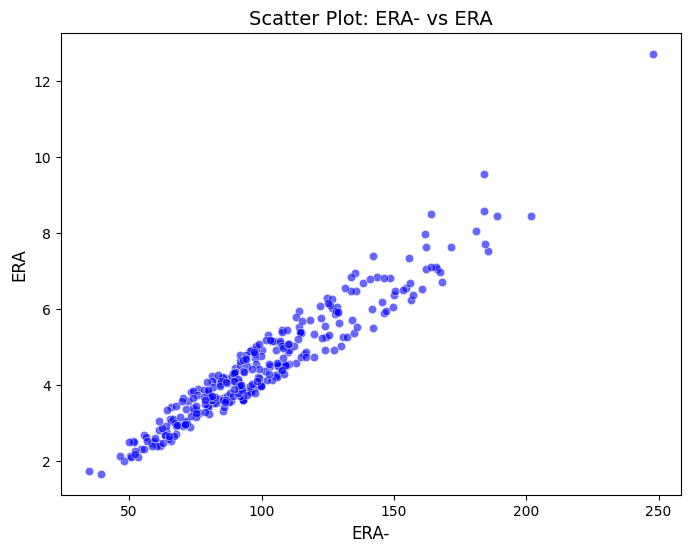


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.961928588894397
P-value: 1.939277381450638e-174
상관계수는 통계적으로 유의미합니다.


In [293]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sp_corr, x='ERA-', y='ERA', color='blue', alpha=0.6)
plt.title('Scatter Plot: ERA- vs ERA', fontsize=14)
plt.xlabel('ERA-', fontsize=12)
plt.ylabel('ERA', fontsize=12)
plt.show()

# 상관계수 및 유의계수 계산
corr, p_value = pearsonr(sp_corr['ERA-'], sp_corr['ERA'])

# 결과 출력
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# 상관계수의 의미
if p_value < 0.05:
    print("상관계수는 통계적으로 유의미합니다.")
else:
    print("상관계수는 통계적으로 유의미하지 않습니다.")


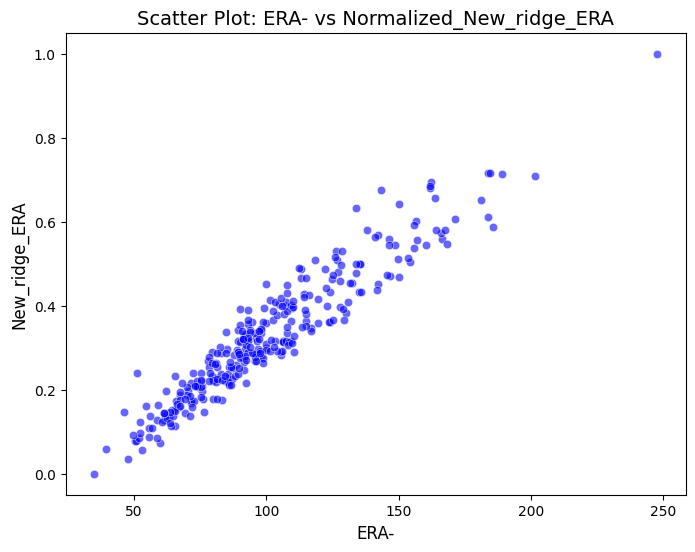


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9504091330171301
P-value: 2.9265690891487146e-157
상관계수는 통계적으로 유의미합니다.


In [294]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sp_corr, x='ERA-', y='Normalized_New_ridge_ERA', color='blue', alpha=0.6)
plt.title('Scatter Plot: ERA- vs Normalized_New_ridge_ERA', fontsize=14)
plt.xlabel('ERA-', fontsize=12)
plt.ylabel('New_ridge_ERA', fontsize=12)
plt.show()

# 상관계수 및 유의계수 계산
corr, p_value = pearsonr(sp_corr['ERA-'], sp_corr['Normalized_New_ridge_ERA'])

# 결과 출력
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# 상관계수의 의미
if p_value < 0.05:
    print("상관계수는 통계적으로 유의미합니다.")
else:
    print("상관계수는 통계적으로 유의미하지 않습니다.")


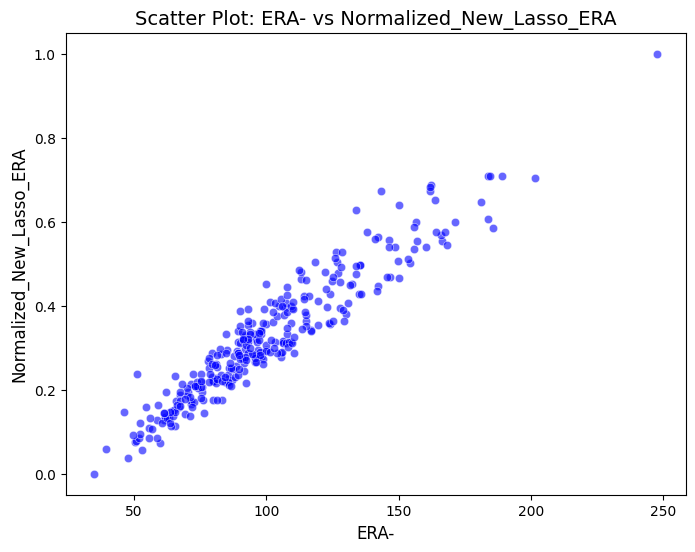


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9503863924902907
P-value: 3.1337007907619506e-157
상관계수는 통계적으로 유의미합니다.


In [295]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sp_corr, x='ERA-', y='Normalized_New_Lasso_ERA', color='blue', alpha=0.6)
plt.title('Scatter Plot: ERA- vs Normalized_New_Lasso_ERA', fontsize=14)
plt.xlabel('ERA-', fontsize=12)
plt.ylabel('Normalized_New_Lasso_ERA', fontsize=12)
plt.show()

# 상관계수 및 유의계수 계산
corr, p_value = pearsonr(sp_corr['ERA-'], sp_corr['Normalized_New_Lasso_ERA'])

# 결과 출력
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# 상관계수의 의미
if p_value < 0.05:
    print("상관계수는 통계적으로 유의미합니다.")
else:
    print("상관계수는 통계적으로 유의미하지 않습니다.")


In [296]:
l1_ratios = np.linspace(0.1, 1, 10)
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42)
elastic_net_cv.fit(X_train_std, y_train)

best_alpha_elastic = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_
print(f'ElasticNet Best alpha: {best_alpha_elastic}')
print(f'ElasticNet Best l1_ratio: {best_l1_ratio}')

elastic_best = ElasticNet(alpha=best_alpha_elastic, l1_ratio=best_l1_ratio)
elastic_best.fit(X_train_std, y_train)

y_pred_elastic = elastic_best.predict(X_test_std)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
print(f'ElasticNet MSE: {mse_elastic}')

elastic_coef_std = pd.DataFrame({
    'Variable': X_train.columns,
    'Standardized Coefficient': elastic_best.coef_
})
print("\n### ElasticNet 표준화 회귀 계수 ###")
print(elastic_coef_std.sort_values(by='Standardized Coefficient', ascending=False))

# 7. 전체 데이터에 대한 예측
X_all_std = scaler.transform(X)  # 전체 X도 같은 방식으로 정규화 필요
sp_corr['Predicted_Elastic_ERA'] = elastic_best.predict(X_all_std)
sp_corr['New_Elastic_ERA'] = sp_corr['Predicted_Elastic_ERA'] * sp_corr['PF_inverse']

# 8. 정규화된 ERA 지표 생성 (0~1 사이로 변환)
sp_corr['Normalized_New_Elastic_ERA'] = (
    (sp_corr['New_Elastic_ERA'] - sp_corr['New_Elastic_ERA'].min()) /
    (sp_corr['New_Elastic_ERA'].max() - sp_corr['New_Elastic_ERA'].min())
)

ElasticNet Best alpha: 0.006866488450042998
ElasticNet Best l1_ratio: 1.0
ElasticNet MSE: 99.0934854053272

### ElasticNet 표준화 회귀 계수 ###
  Variable  Standardized Coefficient
0      RA9                 28.520320
2     BB/9                  1.770085
1      SLG                  0.643394
3       K%                 -2.591143


In [297]:
# Name 변수를 다시 sp_corr에 추가
#cp_corr = pd.concat([name, team, season, cp_corr], axis=1)

# 결과 확인
#print("\n### 선수별 예측 ERA ###")
#print(cp_corr[['Name', 'Team', 'Season', 'ERA', 'Predicted_ERA']])  # 예시 출력
# Name 변수를 다시 sp_corr에 추가
#cp_corr = pd.concat([name, cp_corr], axis=1)

# 결과 확인
print("\n### 정규화된 ElasticNet ERA ###")
print(sp_corr[['Name', 'Team', 'Season', 'ERA-', 'Predicted_Elastic_ERA', 'New_Elastic_ERA', 'Normalized_New_Elastic_ERA']])


### 정규화된 ElasticNet ERA ###
     Name   Team  Season    ERA-  Predicted_Elastic_ERA  New_Elastic_ERA  \
0      놀린    KIA      22   61.29              59.481698        59.571054   
1     양현종    KIA      22   95.62              88.155011        88.287442   
2     임기영    KIA      22  105.43              90.526037        90.662030   
3     파노니    KIA      22   67.60              71.620075        71.727666   
4     이의리    KIA      22   95.80              91.369729        91.506990   
...   ...    ...     ...     ...                    ...              ...   
1439  한현희  Kiwom      21   89.76              90.194770        91.819984   
1440  브리검  Kiwom      21   68.14              76.056169        77.426620   
1441  최원태  Kiwom      21  105.85             113.400470       115.443825   
1443  정찬헌  Kiwom      21   92.23              87.367335        88.941601   
1459  김정인  Kiwom      21  164.07             149.530222       152.224598   

      Normalized_New_Elastic_ERA  
0                      

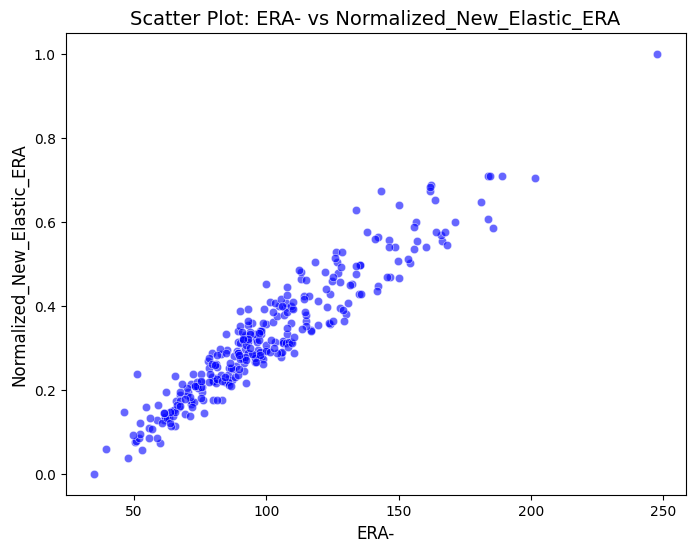


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9503863924902907
P-value: 3.1337007907619506e-157
상관계수는 통계적으로 유의미합니다.


In [298]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sp_corr, x='ERA-', y='Normalized_New_Elastic_ERA', color='blue', alpha=0.6)
plt.title('Scatter Plot: ERA- vs Normalized_New_Elastic_ERA', fontsize=14)
plt.xlabel('ERA-', fontsize=12)
plt.ylabel('Normalized_New_Elastic_ERA', fontsize=12)
plt.show()

# 상관계수 및 유의계수 계산
corr, p_value = pearsonr(sp_corr['ERA-'], sp_corr['Normalized_New_Elastic_ERA'])

# 결과 출력
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# 상관계수의 의미
if p_value < 0.05:
    print("상관계수는 통계적으로 유의미합니다.")
else:
    print("상관계수는 통계적으로 유의미하지 않습니다.")


In [236]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# 1. 파생 변수 생성
sp_corr['PF_inverse'] = 1 / sp_corr['PPF']

# 2. 독립 변수 및 종속 변수 정의
X = sp_corr[['RA9', 'SLG', 'BB/9', 'K%']]
y = sp_corr['ERA-']

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled_all = scaler.transform(X)

# 5. XGBoost 하이퍼파라미터 설정
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [100, 200, 500, 700],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6],
    'alpha': [10, 15, 20, 100]
}
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],  # 학습률
#     'max_depth': [7,8,10],  # 트리의 최대 깊이
#     'n_estimators': [800, 1000, 1200],  # 부스팅 반복 횟수
#     'colsample_bytree': [0.5, 1, 2],  # 트리 생성 시 열 샘플링 비율
#     'alpha': [0, 0.1, 0.5],  # L1 정규화 파라미터
#     'subsample': [0.5,0.8,1],  # 각 부스팅 반복 시 사용되는 데이터 샘플링 비율
#     'lambda': [0, 0.1, 1],  # L2 정규화 파라미터
#     'scale_pos_weight': [0.05, 0.1, 0.3]  # 불균형 데이터셋에서 양성 클래스에 대한 가중치 조정
# }
# 6. XGBoost 모델 및 GridSearchCV
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# 7. 최적 모델 추출 및 예측
best_xg_reg = grid_search.best_estimator_
y_pred_xg = best_xg_reg.predict(X_test_scaled)
mse_xg = mean_squared_error(y_test, y_pred_xg)
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Best XGBoost MSE: {mse_xg:.4f}")

# 8. 전체 데이터에 대한 예측 및 PF 반영
sp_corr['Predicted_ERA_XGBoost'] = best_xg_reg.predict(X_scaled_all)
sp_corr['New_xgboost_ERA'] = sp_corr['Predicted_ERA_XGBoost'] * sp_corr['PF_inverse']

# 9. 결과 출력
print("\n### 최적 XGBoost 예측 ERA ###")
print(sp_corr[['Name', 'ERA-', 'Predicted_ERA_XGBoost', 'New_xgboost_ERA']])

sp_corr['Normalized_New_xgboost_ERA'] = (
    (sp_corr['New_xgboost_ERA'] - sp_corr['New_xgboost_ERA'].min()) /
    (sp_corr['New_xgboost_ERA'].max() - sp_corr['New_xgboost_ERA'].min())
)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits
Best Hyperparameters: {'alpha': 20, 'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best XGBoost MSE: 115.9377

### 최적 XGBoost 예측 ERA ###
     Name    ERA-  Predicted_ERA_XGBoost  New_xgboost_ERA
0      놀린   61.29              60.154495        60.244863
1     양현종   95.62              91.219048        91.356082
2     임기영  105.43             102.669662       102.823898
3     파노니   67.60              68.002319        68.104476
4     이의리   95.80              92.547806        92.686836
...   ...     ...                    ...              ...
1439  한현희   89.76              87.277550        88.850198
1440  브리검   68.14              72.837349        74.149800
1441  최원태  105.85             114.417046       116.478719
1443  정찬헌   92.23              89.240807        90.848831
1459  김정인  164.07             163.997513       166.952573

[308 rows x 4 columns]


In [131]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# 1. 파생 변수 생성
sp_corr['PF_inverse'] = 1 / sp_corr['PPF']

# 2. 학습용/테스트용 데이터 분할 (연도 기준)
train_df = sp_corr[sp_corr['Season'] <= 23].copy()
test_df = sp_corr[sp_corr['Season'] == 24].copy()

# 3. 독립 변수 및 종속 변수 정의
features = ['RA9', 'SLG', 'BB/9', 'K%']  # 필요 시 'PF_inverse'도 추가
X_train = train_df[features]
y_train = train_df['ERA-']

X_test = test_df[features]
y_test = test_df['ERA-']

#4. 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. XGBoost 하이퍼파라미터 (여기서는 튜닝된 값 사용 권장)
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.05,
    max_depth=3,
    n_estimators=200,
    colsample_bytree=0.5,
    alpha=20,
    random_state=42
)

# 6. 모델 학습 및 예측
xg_reg.fit(X_train_scaled, y_train)
y_pred = xg_reg.predict(X_test_scaled)

# 7. 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"2024 예측 RMSE: {rmse:.4f}")

# 8. 결과 저장 및 PF 보정
test_df['Predicted_ERA_XGBoost'] = y_pred
test_df['New_xgboost_ERA'] = test_df['Predicted_ERA_XGBoost'] * test_df['PF_inverse']

print("\n### 2024년 ERA 예측 결과 ###")
print(test_df[['Name', 'ERA-', 'Predicted_ERA_XGBoost', 'New_xgboost_ERA']])

2024 예측 RMSE: 18.3499

### 2024년 ERA 예측 결과 ###
     Name    ERA-  Predicted_ERA_XGBoost  New_xgboost_ERA
54    양현종   83.10              99.119263       100.312987
55     네일   51.34              79.026611        79.978354
57    윤영철   84.94             106.528397       107.811352
58    황동하   90.09             112.879860       114.239308
61   알드레드   91.97              94.371857        95.508407
..    ...     ...                    ...              ...
839  헤이수스   78.24              87.599380        93.839722
840   하영민   92.99             104.432114       111.871573
843   김인범  114.91             118.223503       126.645424
845   김윤하  128.48             133.140549       142.625119
859   이종민  162.27             170.127029       182.246416

[66 rows x 4 columns]


In [237]:
ser = pd.Series(best_xg_reg.feature_importances_, index = X.columns)

top3 = ser.sort_values(ascending = False)[:4]
print(top3)

RA9     0.519599
SLG     0.264965
BB/9    0.108583
K%      0.106853
dtype: float32


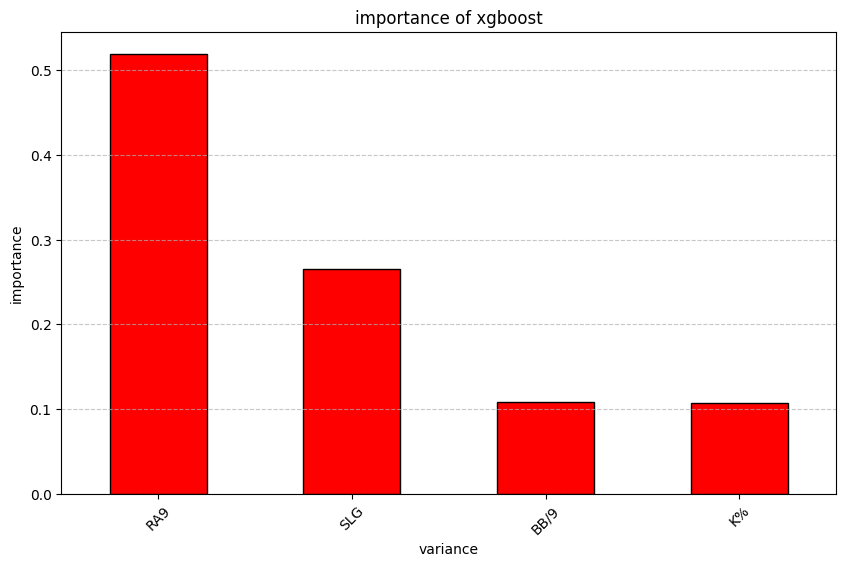

In [238]:
plt.figure(figsize = (10,6))
top3.plot(kind = 'bar', color = 'red', edgecolor = 'black')

plt.title('importance of xgboost')
plt.xlabel('variance')
plt.ylabel('importance')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

In [239]:
print("\n### 정규화된 XGBoost ERA ###")
print(sp_corr[['Name', 'ERA-', 'Predicted_ERA_XGBoost', 'New_xgboost_ERA', 'Normalized_New_xgboost_ERA']])


### 정규화된 XGBoost ERA ###
     Name    ERA-  Predicted_ERA_XGBoost  New_xgboost_ERA  \
0      놀린   61.29              60.154495        60.244863   
1     양현종   95.62              91.219048        91.356082   
2     임기영  105.43             102.669662       102.823898   
3     파노니   67.60              68.002319        68.104476   
4     이의리   95.80              92.547806        92.686836   
...   ...     ...                    ...              ...   
1439  한현희   89.76              87.277550        88.850198   
1440  브리검   68.14              72.837349        74.149800   
1441  최원태  105.85             114.417046       116.478719   
1443  정찬헌   92.23              89.240807        90.848831   
1459  김정인  164.07             163.997513       166.952573   

      Normalized_New_xgboost_ERA  
0                       0.057354  
1                       0.249359  
2                       0.320133  
3                       0.105860  
4                       0.257572  
...                          ..

In [44]:
ser = pd.Series(best_xg_reg.feature_importances_, index = X.columns)

top3 = ser.sort_values(ascending = False)[:4]
print(top3)

RA9     0.519599
SLG     0.264965
BB/9    0.108583
K%      0.106853
dtype: float32


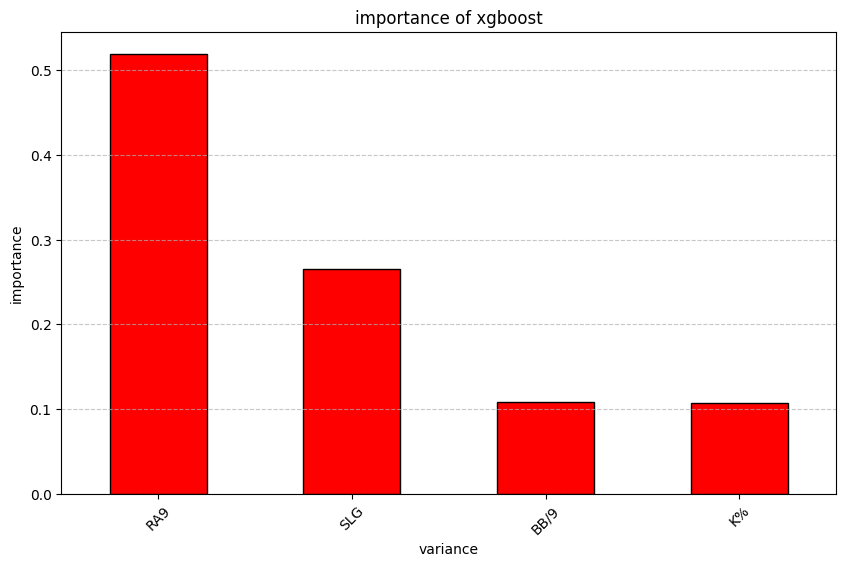

In [45]:
plt.figure(figsize = (10,6))
top3.plot(kind = 'bar', color = 'red', edgecolor = 'black')

plt.title('importance of xgboost')
plt.xlabel('variance')
plt.ylabel('importance')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

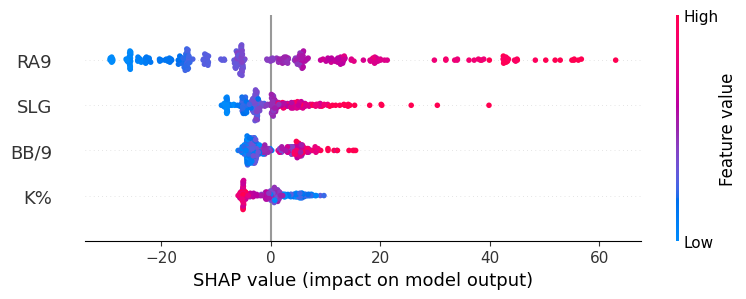

In [46]:
!pip install shap 
import shap

# TreeExplainer로 XGBoost 모델 해석 
explainer = shap.Explainer(best_xg_reg) 
shap_values = explainer(X_scaled_all)  
# 전체 변수 영향력 요약 + 방향성 
shap.summary_plot(shap_values, X, feature_names=X.columns)

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math


# 1. 파생 변수 생성
sp_corr['PF_inverse'] = 1 / sp_corr['PPF']

# 2. 독립 변수 및 종속 변수 정의
X = sp_corr[['RA9', 'SLG', 'BB/9', 'K%']]
y = sp_corr['ERA-']

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled_all = scaler.transform(X)

# params = {
#     'n_estimators': (100, 250, 500, 750, 1000),
#     'max_depth': (3, 6, 9, 12, 15),
#     'min_samples_leaf': (5, 10, 15, 20, 25),
#     'min_samples_split': (5, 10, 15, 20, 25)
# }
params = {
    'n_estimators' : (100, 200, 500),
    'max_depth' : (5,8,10),
    'min_samples_leaf' : (8,18,25),
    'min_samples_split' : (8,16,25)
}

# RandomForest 모델 학습
rf_reg = RandomForestRegressor(random_state = 42, n_jobs = -1)
rf_reg_cv = GridSearchCV(rf_reg, param_grid = params, cv = 2, n_jobs = -1)
rf_reg_cv.fit(X_train, y_train)

# 예측 및 평가
y_pred_rf = rf_reg_cv.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'RandomForest MSE: {mse_rf}')

# 예측값 생성 (전체 데이터에 대해 예측)
sp_corr['Predicted_ERA_RF'] = rf_reg_cv.predict(X)
sp_corr['New_randomforest_ERA'] = sp_corr['Predicted_ERA_RF'] * sp_corr['PF_inverse']
# 결과 확인
print("\n### RandomForest 예측 ERA ###")
print(sp_corr[['Name', 'ERA-', 'Predicted_ERA_RF', 'New_randomforest_ERA']])

sp_corr['Normalized_New_randomforest_ERA'] = (
    (sp_corr['New_randomforest_ERA'] - sp_corr['New_randomforest_ERA'].min()) /
    (sp_corr['New_randomforest_ERA'].max() - sp_corr['New_randomforest_ERA'].min())
)

RandomForest MSE: 118.91166280649458

### RandomForest 예측 ERA ###
     Name    ERA-  Predicted_ERA_RF  New_randomforest_ERA
0      놀린   61.29         61.280178             61.372236
1     양현종   95.62         89.774528             89.909392
2     임기영  105.43         94.617718             94.759858
3     파노니   67.60         69.865981             69.970938
4     이의리   95.80         91.812233             91.950158
...   ...     ...               ...                   ...
1439  한현희   89.76         89.516324             91.129312
1440  브리검   68.14         74.044769             75.378977
1441  최원태  105.85        111.630088            113.641544
1443  정찬헌   92.23         85.218331             86.753875
1459  김정인  164.07        155.201389            157.997953

[308 rows x 4 columns]


In [48]:
print("\n### 정규화된 RandomForest ERA ###")
print(sp_corr[['Name', 'ERA-', 'Predicted_ERA_RF', 'New_randomforest_ERA', 'Normalized_New_randomforest_ERA']])


### 정규화된 RandomForest ERA ###
     Name    ERA-  Predicted_ERA_RF  New_randomforest_ERA  \
0      놀린   61.29         61.280178             61.372236   
1     양현종   95.62         89.774528             89.909392   
2     임기영  105.43         94.617718             94.759858   
3     파노니   67.60         69.865981             69.970938   
4     이의리   95.80         91.812233             91.950158   
...   ...     ...               ...                   ...   
1439  한현희   89.76         89.516324             91.129312   
1440  브리검   68.14         74.044769             75.378977   
1441  최원태  105.85        111.630088            113.641544   
1443  정찬헌   92.23         85.218331             86.753875   
1459  김정인  164.07        155.201389            157.997953   

      Normalized_New_randomforest_ERA  
0                            0.069712  
1                            0.276602  
2                            0.311767  
3                            0.132051  
4                            0.29139

In [49]:
best_rf = rf_reg_cv.best_estimator_
print(best_rf.feature_importances_, '\n')
ser = pd.Series(best_rf.feature_importances_, index = X_train.columns)

top3 = ser.sort_values(ascending = False)[:4]
print(top3)

[0.97640041 0.01000524 0.005894   0.00770036] 

RA9     0.976400
SLG     0.010005
K%      0.007700
BB/9    0.005894
dtype: float64


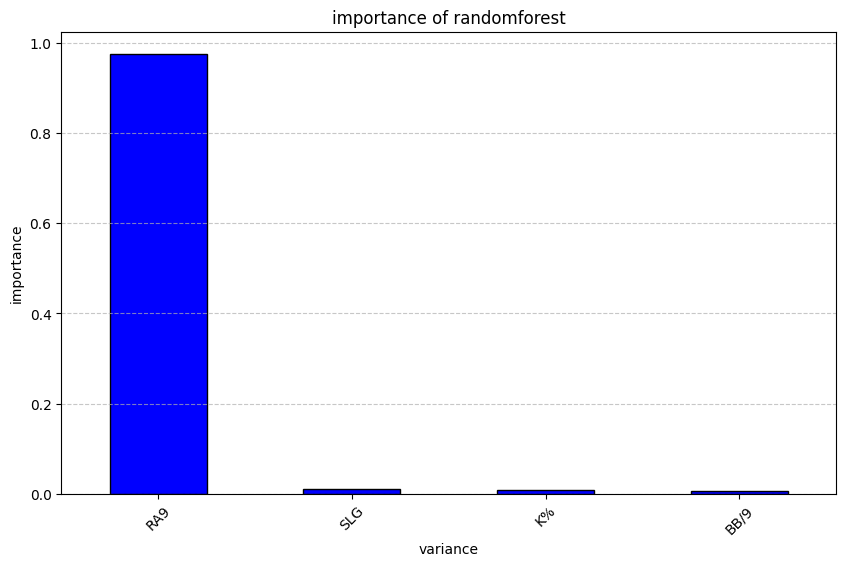

In [50]:
plt.figure(figsize = (10,6))
top3.plot(kind = 'bar', color = 'blue', edgecolor = 'black')

plt.title('importance of randomforest')
plt.xlabel('variance')
plt.ylabel('importance')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

In [51]:
!pip install lightgbm

In [52]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

lgb_reg = lgb.LGBMRegressor()

# 1. 파생 변수 생성
sp_corr['PF_inverse'] = 1 / sp_corr['PPF']

# 2. 독립 변수 및 종속 변수 정의
X = sp_corr[['RA9', 'SLG', 'BB/9', 'K%']]
y = sp_corr['ERA-']

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled_all = scaler.transform(X)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'num_leaves': [20, 31, 40],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000]
}

# GridSearchCV를 사용한 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(lgb_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적 모델 가져오기
best_lgb = grid_search.best_estimator_

# 예측 및 평가
y_pred_lgb = best_lgb.predict(X_test)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)

# 결과 출력
print(f'Best Parameters: {grid_search.best_params_}')
print(f'LightGBM MSE: {mse_lgb}')

# Feature Importance 확인
feature_importance = pd.Series(best_lgb.feature_importances_, index=X.columns).sort_values(ascending=False)

# 상위 10개 변수 출력
print("\n### Top 5 Feature Importance ###")
print(feature_importance[:5])

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 246, number of used features: 4
[LightGBM] [Info] Start training from score 100.081504
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [53]:
sp_corr['Predicted_ERA_gbm'] = best_lgb.predict(X)
sp_corr['New_lightgbm_ERA'] = sp_corr['Predicted_ERA_gbm'] * sp_corr['PF_inverse']

sp_corr['Normalized_New_LightGBM_ERA'] = (
    (sp_corr['New_lightgbm_ERA'] - sp_corr['New_lightgbm_ERA'].min()) /
    (sp_corr['New_lightgbm_ERA'].max() - sp_corr['New_lightgbm_ERA'].min())
)

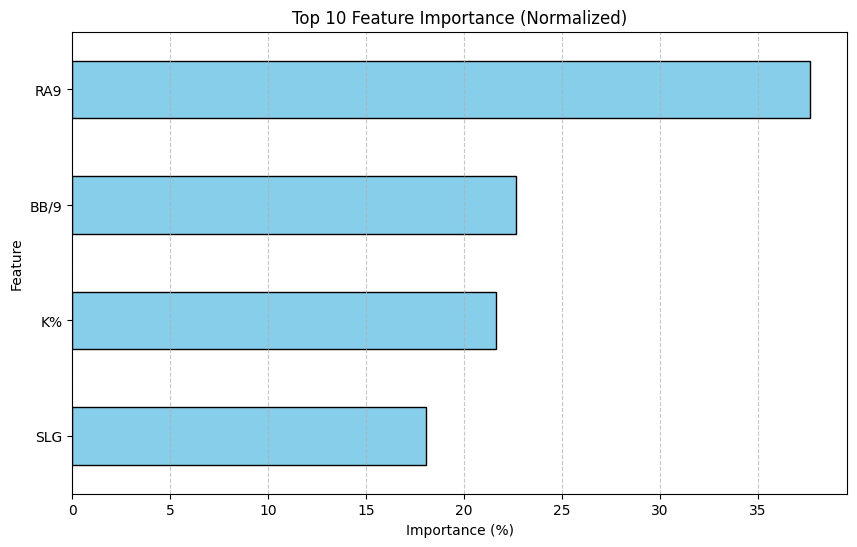

In [54]:
import matplotlib.pyplot as plt

# Feature Importance 비율화 (백분율)
feature_importance_ratio = feature_importance / feature_importance.sum() * 100

# 상위 10개 변수 선택
top_10_features = feature_importance_ratio[:10]

# 시각화
plt.figure(figsize=(10, 6))
top_10_features.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel("Importance (%)")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importance (Normalized)")
plt.gca().invert_yaxis()  # 중요도가 높은 순서대로 정렬
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [55]:
# 결과 확인
print("\n### LightGBM 예측 ERA ###")
print(sp_corr[['Name', 'ERA-', 'Predicted_ERA_gbm', 'New_lightgbm_ERA', 'Normalized_New_LightGBM_ERA']])


### LightGBM 예측 ERA ###
     Name    ERA-  Predicted_ERA_gbm  New_lightgbm_ERA  \
0      놀린   61.29          60.901176         60.992665   
1     양현종   95.62          93.279360         93.419489   
2     임기영  105.43         101.924486        102.077603   
3     파노니   67.60          68.116384         68.218712   
4     이의리   95.80          93.047189         93.186970   
...   ...     ...                ...               ...   
1439  한현희   89.76          87.681143         89.261064   
1440  브리검   68.14          72.421352         73.726307   
1441  최원태  105.85         113.973437        116.027117   
1443  정찬헌   92.23          86.454738         88.012561   
1459  김정인  164.07         164.666157        167.633266   

      Normalized_New_LightGBM_ERA  
0                        0.073537  
1                        0.318950  
2                        0.384476  
3                        0.128225  
4                        0.317190  
...                           ...  
1439                     0

In [244]:
sp_corr.to_csv("Predict_starter_PPF_newsample_eraplus5.csv", index = False, encoding = "utf-8-sig")
print("done")

done


In [56]:
corr, p_value = pearsonr(sp_corr['ERA'], sp_corr['rRA9pf'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(sp_corr['ERA'], sp_corr['rRA9pf']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9658219480080467
P-value: 1.7755105875579153e-181
RMSE: 0.49241585740446725


In [57]:
from sklearn.metrics import r2_score

# R² 계산
r2 = r2_score(sp_corr['ERA'], sp_corr['rRA9pf'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.8905517929105008


In [321]:
corr, p_value = pearsonr(sp_corr['ERA-'], sp_corr['ERA'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(sp_corr['ERA-'], sp_corr['ERA']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.961928588894397
P-value: 1.939277381450638e-174
RMSE: 100.46049487171626


In [322]:
from sklearn.metrics import r2_score

# R² 계산
r2 = r2_score(sp_corr['ERA-'], sp_corr['ERA'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: -8.805858981581


In [240]:
#another_sp_corr = sp_corr[['ERA-', 'ERA', 'Normalized_New_ridge_ERA', 'Normalized_New_Lasso_ERA', 'Normalized_New_Elastic_ERA', 'Normalized_New_xgboost_ERA','Normalized_New_randomforest_ERA', 'Normalized_New_LightGBM_ERA']]
another_sp_corr = sp_corr[['ERA-', 'ERA', 'Normalized_New_ridge_ERA', 'Normalized_New_Lasso_ERA', 'Normalized_New_Elastic_ERA', 'Normalized_New_xgboost_ERA']]
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import numpy as np

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(another_sp_corr)

# 표준화된 데이터를 다시 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=another_sp_corr.columns)


In [241]:
scaled_df

,ERA-,ERA,Normalized_New_ridge_ERA,Normalized_New_Lasso_ERA,Normalized_New_Elastic_ERA,Normalized_New_xgboost_ERA
0,-1.211708,-1.359296,-1.307487,-1.307936,-1.307936,-1.276411
1,-0.141615,-0.432143,-0.377550,-0.375388,-0.375388,-0.277290
2,0.164170,-0.170122,-0.287496,-0.298275,-0.298275,0.090993
3,-1.015020,-1.191334,-0.917674,-0.913157,-0.913157,-1.024004
4,-0.136005,-0.425425,-0.268114,-0.270835,-0.270835,-0.234554
...,...,...,...,...,...,...
303,-0.324276,-0.405269,-0.263338,-0.260671,-0.260671,-0.357765
304,-0.998188,-1.036808,-0.722512,-0.728087,-0.728087,-0.829861
305,0.177261,0.058307,0.501297,0.506499,0.506499,0.529511
306,-0.247284,-0.338084,-0.357596,-0.354145,-0.354145,-0.293580


In [162]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import numpy as np

corr, p_value = pearsonr(scaled_df['ERA-'], scaled_df['ERA'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['ERA-'], scaled_df['ERA']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9619285888943967
P-value: 1.9392773814540334e-174
RMSE: 0.27593988876421305


In [163]:
from sklearn.metrics import r2_score

# R² 계산
r2 = r2_score(scaled_df['ERA-'], scaled_df['ERA'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.9238571777887937


In [164]:
corr, p_value = pearsonr(scaled_df['ERA-'], scaled_df['Normalized_New_ridge_ERA'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['ERA-'], scaled_df['Normalized_New_ridge_ERA']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.95040913301713
P-value: 2.926569089150687e-157
RMSE: 0.31493131626711857


In [165]:
from sklearn.metrics import r2_score

# R² 계산
r2 = r2_score(scaled_df['ERA-'], scaled_df['Normalized_New_ridge_ERA'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.9008182660342601


In [166]:
corr, p_value = pearsonr(scaled_df['ERA-'], scaled_df['Normalized_New_Lasso_ERA'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['ERA-'], scaled_df['Normalized_New_Lasso_ERA']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9503863924902907
P-value: 3.1337007907619506e-157
RMSE: 0.31500351588421804


In [167]:
from sklearn.metrics import r2_score

# R² 계산
r2 = r2_score(scaled_df['ERA-'], scaled_df['Normalized_New_Lasso_ERA'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.9007727849805812


In [168]:
corr, p_value = pearsonr(scaled_df['ERA-'], scaled_df['Normalized_New_Elastic_ERA'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['ERA-'], scaled_df['Normalized_New_Elastic_ERA']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9503863924902907
P-value: 3.1337007907619506e-157
RMSE: 0.31500351588421804


In [169]:
from sklearn.metrics import r2_score

# R² 계산
r2 = r2_score(scaled_df['ERA-'], scaled_df['Normalized_New_Elastic_ERA'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.9007727849805812


In [242]:
corr, p_value = pearsonr(scaled_df['ERA-'], scaled_df['Normalized_New_xgboost_ERA'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['ERA-'], scaled_df['Normalized_New_xgboost_ERA']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9669872372878243
P-value: 9.619843589161041e-184
RMSE: 0.2569543255606947


In [243]:
from sklearn.metrics import r2_score

# R² 계산
r2 = r2_score(scaled_df['ERA-'], scaled_df['Normalized_New_xgboost_ERA'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.9339744745756485


In [70]:
corr, p_value = pearsonr(scaled_df['ERA-'], scaled_df['Normalized_New_randomforest_ERA'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['ERA-'], scaled_df['Normalized_New_randomforest_ERA']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9467276840224143
P-value: 1.2611717191375086e-152
RMSE: 0.32641175217073926


In [71]:
from sklearn.metrics import r2_score

# R² 계산
r2 = r2_score(scaled_df['ERA-'], scaled_df['Normalized_New_randomforest_ERA'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.893455368044828


In [72]:
corr, p_value = pearsonr(scaled_df['ERA-'], scaled_df['Normalized_New_LightGBM_ERA'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['ERA-'], scaled_df['Normalized_New_LightGBM_ERA']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9486073108798467
P-value: 5.986994314161507e-155
RMSE: 0.32060158801900346


In [73]:
from sklearn.metrics import r2_score

# R² 계산
r2 = r2_score(scaled_df['ERA-'], scaled_df['Normalized_New_LightGBM_ERA'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.8972146217596932


In [245]:
name = sp_data['Name']
team = sp_data['Team']
season = sp_data['Season']
PF = sp_data['PPF']
sp_corr = sp_data.drop(columns = ['Name', 'Team', 'Season', 'PPF'], axis = 1)
sp_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 1459
Columns: 111 entries, War to ESPN
dtypes: float64(76), int64(35)
memory usage: 269.5 KB


In [246]:
from scipy.stats import pearsonr

# 'ERA' 변수와 다른 변수들 간의 상관계수 및 p-value 계산
results = []

for col in sp_corr.columns:
    if col != 'FIP' and not ('ERA' in col or 'war' in col or 'FIP' in col or 'War' in col or 'waa' in col):  # 'ERA'로 시작하거나 포함된 변수 제외
        corr, p_value = pearsonr(sp_corr['FIP-'], sp_corr[col])
        results.append((col, abs(corr), p_value))  # 절댓값 상관계수 사용
        
# 데이터프레임 변환 및 정렬
corr_fip_df = pd.DataFrame(results, columns=['Variable', 'Correlation', 'P_value'])
corr_fip_df = corr_fip_df[corr_fip_df['Correlation'] >= 0.5].sort_values(by='Correlation', ascending=False)

# 결과 출력
print(corr_fip_df)

   Variable  Correlation       P_value
36    K-BB%     0.866340  2.885174e-94
43      OPS     0.779405  4.248770e-64
41      OBP     0.763650  4.265014e-60
39    rRA9-     0.760972  1.902117e-59
32     K/BB     0.757551  1.247535e-58
29     WHIP     0.756935  1.744987e-58
28   rRA9pf     0.734611  1.751484e-53
26      RA9     0.728551  3.270745e-52
49      QS%     0.726870  7.265835e-52
34       K%     0.723484  3.561198e-51
27     rRA9     0.721344  9.603932e-51
65    IP/GS     0.716055  1.072932e-49
42      SLG     0.712187  6.054227e-49
33     HR/9     0.698107  2.603495e-46
48       QS     0.651938  1.172632e-38
22       SO     0.650202  2.143206e-38
80       SD     0.630203  1.692397e-35
31     BB/9     0.629151  2.371629e-35
30      K/9     0.618433  6.870808e-34
66     P/GS     0.599372  2.005606e-31
45      P/G     0.588163  4.747801e-30
6         W     0.586020  8.574139e-30
35      BB%     0.577384  8.885060e-29
46     P/IP     0.575303  1.544576e-28
97   HR/FB%     0.564824 

C:\Users\user\AppData\Local\Temp\ipykernel_18044\194919995.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(sp_corr['FIP-'], sp_corr[col])


In [247]:
import pandas as pd
import statsmodels.api as sm

# AIC 계산 함수
def calculate_aic(X, y):
    model = sm.OLS(y, sm.add_constant(X)).fit()
    return model.aic

# 'ERA'를 타겟 변수로 설정
y = sp_corr['FIP-']
candidate_features = corr_fip_df['Variable'].tolist()  # 상관계수 높은 25개 변수

# 전체 변수로 모델 시작
selected_features = []  # 최종 선택된 변수 리스트
best_aic = float('inf')  # 현재 AIC 값 (최소화할 목표)

while True:
    improved = False
    remaining_features = list(set(candidate_features) - set(selected_features))

    # 1️⃣ **전진 선택 (Forward Selection)**
    aic_with_add = []
    for feature in remaining_features:
        temp_features = selected_features + [feature]
        X_temp = sp_corr[temp_features]
        temp_aic = calculate_aic(X_temp, y)
        aic_with_add.append((feature, temp_aic))

    if aic_with_add:
        min_aic_feature, min_aic = min(aic_with_add, key=lambda x: x[1])
        if min_aic < best_aic:  # AIC 감소하면 추가
            best_aic = min_aic
            selected_features.append(min_aic_feature)
            improved = True

    # 2️⃣ **후진 제거 (Backward Elimination)**
    aic_with_remove = []
    for feature in selected_features:
        temp_features = selected_features.copy()
        temp_features.remove(feature)
        X_temp = sp_corr[temp_features]
        temp_aic = calculate_aic(X_temp, y)
        aic_with_remove.append((feature, temp_aic))

    if aic_with_remove:
        min_aic_feature, min_aic = min(aic_with_remove, key=lambda x: x[1])
        if min_aic < best_aic:  # AIC 감소하면 제거
            best_aic = min_aic
            selected_features.remove(min_aic_feature)
            improved = True

    if not improved:  # 더 이상 AIC 개선이 없으면 종료
        break

# 최적 변수 출력
print("Best AIC:", best_aic)
print("Best Feature Subset:", selected_features)

Best AIC: 1587.4051445559026
Best Feature Subset: ['K-BB%', 'HR/9', 'rRA9-', 'rRA9pf', 'AVG', 'OBP', 'K/9', 'rRA9', 'IP/GS', 'HR/FB%', 'OPS', 'K%', 'BB/9', 'WHIP']


In [248]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중공선성(VIF) 계산 함수
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# 최적 변수 조합으로 VIF 계산
X_best = sp_corr[list(selected_features)]  # 최적 변수 조합 선택
vif_df = calculate_vif(sm.add_constant(X_best))  # 상수항 포함하여 VIF 계산

# VIF 출력
print("\n### VIF (Variance Inflation Factor) ###")
print(vif_df)


### VIF (Variance Inflation Factor) ###
   Variable          VIF
0     const  1319.446984
1     K-BB%   734.072692
2      HR/9    26.370791
3     rRA9-    19.718814
4    rRA9pf   121.029399
5       AVG   151.614555
6       OBP    67.729890
7       K/9   177.754905
8      rRA9    78.225898
9     IP/GS     3.321484
10   HR/FB%    11.191395
11      OPS    65.673675
12       K%   497.867755
13     BB/9   352.462759
14     WHIP   220.535495


In [249]:
X_best = X_best.drop(columns = ['rRA9pf', 'rRA9-', 'rRA9', 'IP/GS'])
vif_df_without_variance = calculate_vif(sm.add_constant(X_best))

print("\n### VIF (Variance Inflation Factor) ###")
print(vif_df_without_variance)


### VIF (Variance Inflation Factor) ###
   Variable         VIF
0     const  888.082208
1     K-BB%  728.836303
2      HR/9   23.913722
3       AVG  138.668026
4       OBP   64.986599
5       K/9  175.711351
6    HR/FB%   10.350358
7       OPS   57.289115
8        K%  487.937915
9      BB/9  344.068203
10     WHIP  194.790778


In [250]:
X_best = X_best.drop(columns = ['AVG', 'HR/FB%', 'WHIP', 'OPS', 'K-BB%', 'K%'])
vif_df_without_variance = calculate_vif(sm.add_constant(X_best))

print("\n### VIF (Variance Inflation Factor) ###")
print(vif_df_without_variance)


### VIF (Variance Inflation Factor) ###
  Variable         VIF
0    const  215.886137
1     HR/9    1.307197
2      OBP    2.861278
3      K/9    1.358240
4     BB/9    2.100039


In [251]:
#cp_corr = pd.concat([cp_corr, PPF], axis = 1)
sp_corr = pd.concat([sp_corr, team, name, season, PF], axis = 1)
sp_corr = sp_corr.loc[:, ~sp_corr.columns.duplicated()]

# 결과 확인
print(sp_corr)

       War   G  GS  GR  GF  CG  SHO   W   L  S  ...   FB%  LD%  GB/FB  HR/FB%  \
0     4.61  21  21   0   0   0    0   8   8  0  ...  48.7  3.8    1.0     3.9   
1     3.46  30  30   0   0   0    0  12   7  0  ...  49.9  3.1    0.9     5.1   
2     2.85  26  23   3   1   0    0   4  13  1  ...  56.7  3.7    0.7     7.3   
3     2.75  14  14   0   0   0    0   3   4  0  ...  51.4  2.8    0.9     3.9   
4     2.66  29  28   1   0   0    0  10  10  0  ...  56.9  2.3    0.7     7.4   
...    ...  ..  ..  ..  ..  ..  ...  ..  .. ..  ...   ...  ...    ...     ...   
1439  2.24  18  15   3   0   0    0   6   2  0  ...  48.4  2.9    1.0     3.0   
1440  1.91  10  10   0   0   0    0   7   3  0  ...  40.9  2.9    1.4     8.6   
1441  1.68  28  28   0   0   0    0   9  11  0  ...  51.5  3.7    0.9     4.4   
1443  1.45  11  11   0   1   1    1   3   3  0  ...  50.7  4.5    0.9     1.0   
1459 -0.07  11   6   5   1   0    0   1   2  0  ...  58.2  2.7    0.7     9.4   

      if1B%      ESPN   Tea

In [252]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# 독립 변수(X)와 종속 변수(y) 정의
sp_corr['inver_PF'] = 1 / sp_corr['PPF']
X = sp_corr[['HR/9', 'OBP', 'BB/9', 'K/9']]
y = sp_corr['FIP-']  # 종속 변수

# 데이터 나누기 (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화 (Lasso, Ridge는 가중치 크기에 영향을 받으므로 표준화가 필요함)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [253]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# 1. 입력 데이터 표준화
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 2. RidgeCV 학습 (표준화된 데이터 사용)
alphas = np.logspace(-4, 2, 50)
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_std, y_train)

# 3. 최적 alpha 출력
best_alpha = ridge_cv.alpha_
print(f'Best alpha: {best_alpha}')

# 4. 최적 alpha로 Ridge 재학습
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_std, y_train)

# 5. 예측 및 MSE 평가
y_pred_ridge = ridge_best.predict(X_test_std)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Optimized Ridge MSE: {mse_ridge}')

# 6. 표준화 회귀계수 출력
ridge_coef_std = pd.DataFrame({
    'Variable': X_train.columns,
    'Standardized Coefficient': ridge_best.coef_
})
print("\n### Ridge 표준화 회귀 계수 ###")
print(ridge_coef_std.sort_values(by='Standardized Coefficient', ascending=False))

# 7. 전체 데이터에 대한 예측
X_all_std = scaler.transform(X)  # 전체 X도 같은 방식으로 정규화 필요
sp_corr['Predicted_Ridge_FIP'] = ridge_best.predict(X_all_std)
sp_corr['New_ridge_FIP'] = sp_corr['Predicted_Ridge_FIP'] * sp_corr['inver_PF']

# 8. 정규화된 ERA 지표 생성 (0~1 사이로 변환)
sp_corr['Normalized_New_ridge_FIP'] = (
    (sp_corr['New_ridge_FIP'] - sp_corr['New_ridge_FIP'].min()) /
    (sp_corr['New_ridge_FIP'].max() - sp_corr['New_ridge_FIP'].min())
)

Best alpha: 0.8286427728546842
Optimized Ridge MSE: 45.550132539408445

### Ridge 표준화 회귀 계수 ###
  Variable  Standardized Coefficient
2     BB/9                 10.471809
0     HR/9                  9.503252
1      OBP                  1.366032
3      K/9                -10.534460


C:\Users\user\.conda\envs\clean_env\lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [254]:
# 결과 확인
print("\n### 선수별 예측 FIP ###")
print(sp_corr[['Name', 'Team', 'Season', 'FIP',  'FIP-', 'Predicted_Ridge_FIP', 'Normalized_New_ridge_FIP']])  # 예시 출력


### 선수별 예측 FIP ###
     Name   Team  Season   FIP    FIP-  Predicted_Ridge_FIP  \
0      놀린    KIA      22  3.05   75.84            71.627069   
1     양현종    KIA      22  3.66   90.92            87.193572   
2     임기영    KIA      22  4.81  119.56           109.748390   
3     파노니    KIA      22  3.27   81.25            78.716854   
4     이의리    KIA      22  4.23  105.11            94.285218   
...   ...    ...     ...   ...     ...                  ...   
1439  한현희  Kiwom      21  3.85   88.79            91.016857   
1440  브리검  Kiwom      21  4.45  102.85           101.334754   
1441  최원태  Kiwom      21  4.38  101.08           103.231372   
1443  정찬헌  Kiwom      21  3.78   87.31            92.379145   
1459  김정인  Kiwom      21  6.32  145.98           139.615331   

      Normalized_New_ridge_FIP  
0                     0.188570  
1                     0.329937  
2                     0.534767  
3                     0.252956  
4                     0.394339  
...                      

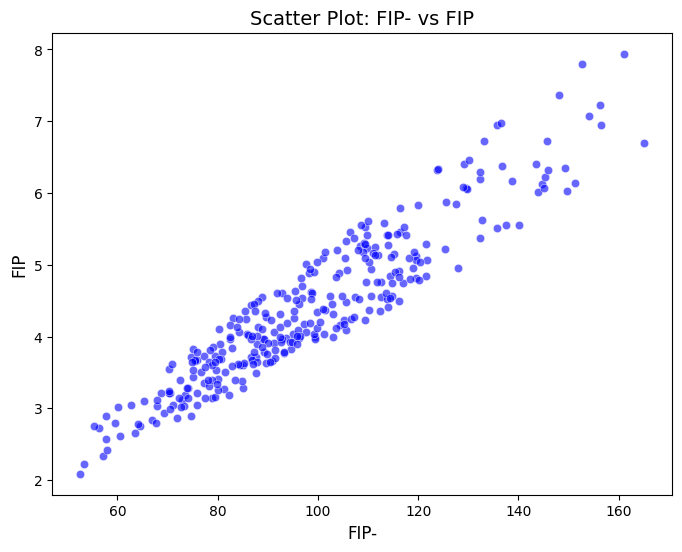


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.936613349481867
P-value: 2.0426688144909552e-141
상관계수는 통계적으로 유의미합니다.


In [255]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sp_corr, x='FIP-', y='FIP', color='blue', alpha=0.6)
plt.title('Scatter Plot: FIP- vs FIP', fontsize=14)
plt.xlabel('FIP-', fontsize=12)
plt.ylabel('FIP', fontsize=12)
plt.show()

# 상관계수 및 유의계수 계산
corr, p_value = pearsonr(sp_corr['FIP-'], sp_corr['FIP'])

# 결과 출력
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# 상관계수의 의미
if p_value < 0.05:
    print("상관계수는 통계적으로 유의미합니다.")
else:
    print("상관계수는 통계적으로 유의미하지 않습니다.")


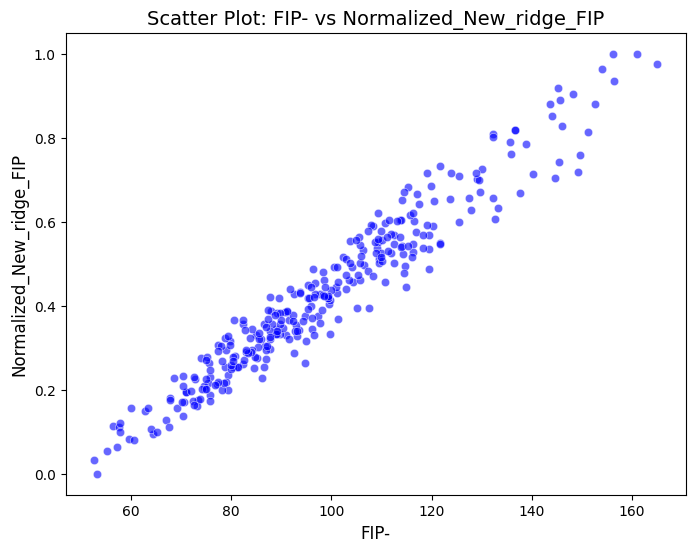


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.969687872516854
P-value: 2.524172484758644e-189
상관계수는 통계적으로 유의미합니다.


In [256]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sp_corr, x='FIP-', y='Normalized_New_ridge_FIP', color='blue', alpha=0.6)
plt.title('Scatter Plot: FIP- vs Normalized_New_ridge_FIP', fontsize=14)
plt.xlabel('FIP-', fontsize=12)
plt.ylabel('Normalized_New_ridge_FIP', fontsize=12)
plt.show()

# 상관계수 및 유의계수 계산
corr, p_value = pearsonr(sp_corr['FIP-'], sp_corr['Normalized_New_ridge_FIP'])

# 결과 출력
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# 상관계수의 의미
if p_value < 0.05:
    print("상관계수는 통계적으로 유의미합니다.")
else:
    print("상관계수는 통계적으로 유의미하지 않습니다.")


In [257]:
from sklearn.linear_model import LassoCV, Lasso, ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# 1. 데이터 표준화
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# ----------------------------
# 2. Lasso 모델 학습 (표준화 후)
# ----------------------------
alphas = np.logspace(-4, 2, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_std, y_train)

best_alpha_lasso = lasso_cv.alpha_
print(f'Lasso Best alpha: {best_alpha_lasso}')

lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(X_train_std, y_train)

y_pred_lasso = lasso_best.predict(X_test_std)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso MSE: {mse_lasso}')

lasso_coef_std = pd.DataFrame({
    'Variable': X_train.columns,
    'Standardized Coefficient': lasso_best.coef_
})
print("\n### Lasso 표준화 회귀 계수 ###")
print(lasso_coef_std.sort_values(by='Standardized Coefficient', ascending=False))

# 7. 전체 데이터에 대한 예측
X_all_std = scaler.transform(X)  # 전체 X도 같은 방식으로 정규화 필요
sp_corr['lasso_Predicted_FIP'] = lasso_best.predict(X_all_std)
sp_corr['New_Lasso_FIP'] = sp_corr['lasso_Predicted_FIP'] * sp_corr['inver_PF']

# 8. 정규화된 ERA 지표 생성 (0~1 사이로 변환)
sp_corr['Normalized_New_Lasso_FIP'] = (
    (sp_corr['New_Lasso_FIP'] - sp_corr['New_Lasso_FIP'].min()) /
    (sp_corr['New_Lasso_FIP'].max() - sp_corr['New_Lasso_FIP'].min())
)

Lasso Best alpha: 0.00040949150623804275
Lasso MSE: 45.74571242665732

### Lasso 표준화 회귀 계수 ###
  Variable  Standardized Coefficient
2     BB/9                 10.568313
0     HR/9                  9.548569
1      OBP                  1.253588
3      K/9                -10.600217


In [258]:
# 결과 확인
print("\n### 선수별 예측 FIP ###")
print(sp_corr[['Name', 'Team', 'Season', 'FIP',  'FIP-', 'lasso_Predicted_FIP', 'Normalized_New_Lasso_FIP']])  # 예시 출력


### 선수별 예측 FIP ###
     Name   Team  Season   FIP    FIP-  lasso_Predicted_FIP  \
0      놀린    KIA      22  3.05   75.84            71.578423   
1     양현종    KIA      22  3.66   90.92            87.211642   
2     임기영    KIA      22  4.81  119.56           109.821774   
3     파노니    KIA      22  3.27   81.25            78.686008   
4     이의리    KIA      22  4.23  105.11            94.340074   
...   ...    ...     ...   ...     ...                  ...   
1439  한현희  Kiwom      21  3.85   88.79            91.006894   
1440  브리검  Kiwom      21  4.45  102.85           101.418938   
1441  최원태  Kiwom      21  4.38  101.08           103.214388   
1443  정찬헌  Kiwom      21  3.78   87.31            92.345486   
1459  김정인  Kiwom      21  6.32  145.98           139.816323   

      Normalized_New_Lasso_FIP  
0                     0.188207  
1                     0.329909  
2                     0.534851  
3                     0.252632  
4                     0.394523  
...                      

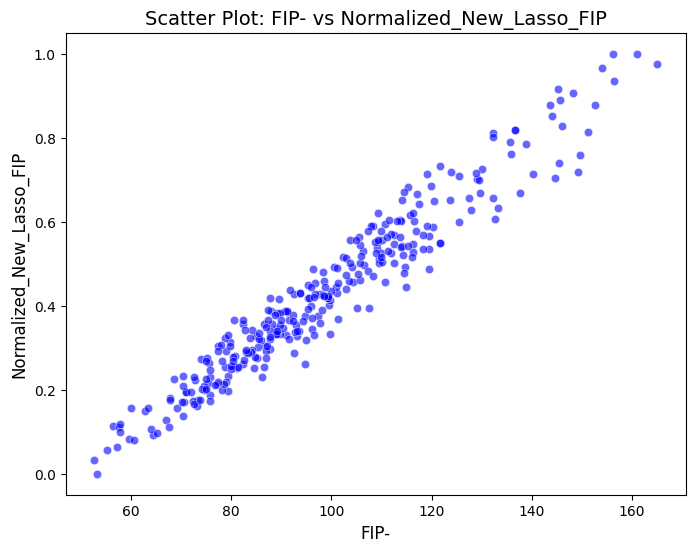


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9696844401992402
P-value: 2.5676055498952845e-189
상관계수는 통계적으로 유의미합니다.


In [259]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sp_corr, x='FIP-', y='Normalized_New_Lasso_FIP', color='blue', alpha=0.6)
plt.title('Scatter Plot: FIP- vs Normalized_New_Lasso_FIP', fontsize=14)
plt.xlabel('FIP-', fontsize=12)
plt.ylabel('Normalized_New_Lasso_FIP', fontsize=12)
plt.show()

# 상관계수 및 유의계수 계산
corr, p_value = pearsonr(sp_corr['FIP-'], sp_corr['Normalized_New_Lasso_FIP'])

# 결과 출력
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# 상관계수의 의미
if p_value < 0.05:
    print("상관계수는 통계적으로 유의미합니다.")
else:
    print("상관계수는 통계적으로 유의미하지 않습니다.")


In [260]:
l1_ratios = np.linspace(0.1, 1, 10)
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42)
elastic_net_cv.fit(X_train_std, y_train)

best_alpha_elastic = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_
print(f'ElasticNet Best alpha: {best_alpha_elastic}')
print(f'ElasticNet Best l1_ratio: {best_l1_ratio}')

elastic_best = ElasticNet(alpha=best_alpha_elastic, l1_ratio=best_l1_ratio)
elastic_best.fit(X_train_std, y_train)

y_pred_elastic = elastic_best.predict(X_test_std)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
print(f'ElasticNet MSE: {mse_elastic}')

elastic_coef_std = pd.DataFrame({
    'Variable': X_train.columns,
    'Standardized Coefficient': elastic_best.coef_
})
print("\n### ElasticNet 표준화 회귀 계수 ###")
print(elastic_coef_std.sort_values(by='Standardized Coefficient', ascending=False))

# 7. 전체 데이터에 대한 예측
X_all_std = scaler.transform(X)  # 전체 X도 같은 방식으로 정규화 필요
sp_corr['Predicted_Elastic_FIP'] = elastic_best.predict(X_all_std)
sp_corr['New_Elastic_FIP'] = sp_corr['Predicted_Elastic_FIP'] * sp_corr['inver_PF']

# 8. 정규화된 ERA 지표 생성 (0~1 사이로 변환)
sp_corr['Normalized_New_Elastic_FIP'] = (
    (sp_corr['New_Elastic_FIP'] - sp_corr['New_Elastic_FIP'].min()) /
    (sp_corr['New_Elastic_FIP'].max() - sp_corr['New_Elastic_FIP'].min())
)

ElasticNet Best alpha: 0.0005428675439323859
ElasticNet Best l1_ratio: 0.8
ElasticNet MSE: 45.738888291807456

### ElasticNet 표준화 회귀 계수 ###
  Variable  Standardized Coefficient
2     BB/9                 10.565109
0     HR/9                  9.547062
1      OBP                  1.257302
3      K/9                -10.598032


In [261]:
# 결과 확인
print("\n### 선수별 예측 FIP ###")
print(sp_corr[['Name', 'Team', 'Season', 'FIP',  'FIP-', 'Predicted_Elastic_FIP', 'Normalized_New_Elastic_FIP']])  # 예시 출력


### 선수별 예측 FIP ###
     Name   Team  Season   FIP    FIP-  Predicted_Elastic_FIP  \
0      놀린    KIA      22  3.05   75.84              71.580063   
1     양현종    KIA      22  3.66   90.92              87.211058   
2     임기영    KIA      22  4.81  119.56             109.819338   
3     파노니    KIA      22  3.27   81.25              78.687050   
4     이의리    KIA      22  4.23  105.11              94.338264   
...   ...    ...     ...   ...     ...                    ...   
1439  한현희  Kiwom      21  3.85   88.79              91.007230   
1440  브리검  Kiwom      21  4.45  102.85             101.416150   
1441  최원태  Kiwom      21  4.38  101.08             103.214942   
1443  정찬헌  Kiwom      21  3.78   87.31              92.346603   
1459  김정인  Kiwom      21  6.32  145.98             139.809630   

      Normalized_New_Elastic_FIP  
0                       0.188219  
1                       0.329910  
2                       0.534848  
3                       0.252642  
4                       

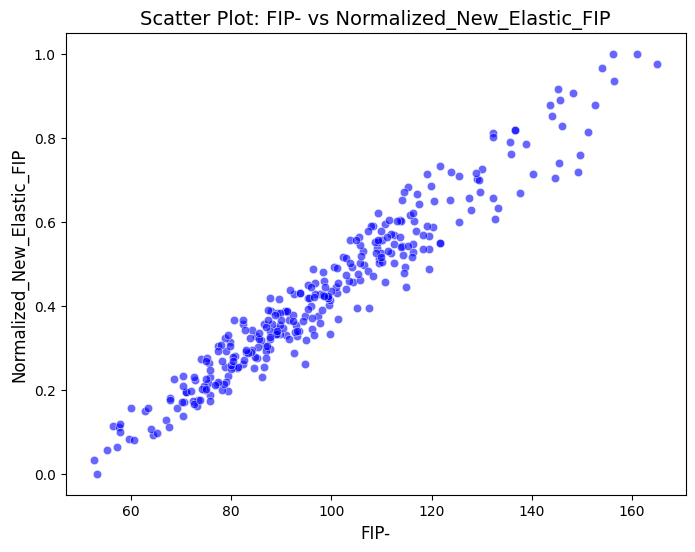


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9696846881908314
P-value: 2.5644427002680818e-189
상관계수는 통계적으로 유의미합니다.


In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sp_corr, x='FIP-', y='Normalized_New_Elastic_FIP', color='blue', alpha=0.6)
plt.title('Scatter Plot: FIP- vs Normalized_New_Elastic_FIP', fontsize=14)
plt.xlabel('FIP-', fontsize=12)
plt.ylabel('Normalized_New_Elastic_FIP', fontsize=12)
plt.show()

# 상관계수 및 유의계수 계산
corr, p_value = pearsonr(sp_corr['FIP-'], sp_corr['Normalized_New_Elastic_FIP'])

# 결과 출력
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# 상관계수의 의미
if p_value < 0.05:
    print("상관계수는 통계적으로 유의미합니다.")
else:
    print("상관계수는 통계적으로 유의미하지 않습니다.")


In [263]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# 1. 파생 변수 생성
sp_corr['PF_inverse'] = 1 / sp_corr['PPF']

# 2. 독립 변수 및 종속 변수 정의
X = sp_corr[['HR/9', 'OBP', 'BB/9', 'K/9']]
y = sp_corr['FIP-']  # 종속 변수

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled_all = scaler.transform(X)

# 5. XGBoost 하이퍼파라미터 설정
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2],
              'max_depth': [2, 3, 4, 5, 6, 7],
              'n_estimators': [500, 600, 800, 1000],
              'colsample_bytree': [0.2, 0.3, 0.4, 0.5],
              'alpha': [10, 12, 13, 15, 20] 
             }
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],  # 학습률
#     'max_depth': [7,8,10],  # 트리의 최대 깊이
#     'n_estimators': [800, 1000, 1200],  # 부스팅 반복 횟수
#     'colsample_bytree': [0.5, 1, 2],  # 트리 생성 시 열 샘플링 비율
#     'alpha': [0, 0.1, 0.5],  # L1 정규화 파라미터
#     'subsample': [0.5,0.8,1],  # 각 부스팅 반복 시 사용되는 데이터 샘플링 비율
#     'lambda': [0, 0.1, 1],  # L2 정규화 파라미터
#     'scale_pos_weight': [0.05, 0.1, 0.3]  # 불균형 데이터셋에서 양성 클래스에 대한 가중치 조정
# }
# 6. XGBoost 모델 및 GridSearchCV
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# 7. 최적 모델 추출 및 예측
best_xg_reg = grid_search.best_estimator_
y_pred_xg = best_xg_reg.predict(X_test_scaled)
mse_xg = mean_squared_error(y_test, y_pred_xg)
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Best XGBoost MSE: {mse_xg:.4f}")

# 8. 전체 데이터에 대한 예측 및 PF 반영
sp_corr['Predicted_FIP_XGBoost'] = best_xg_reg.predict(X_scaled_all)
sp_corr['New_xgboost_FIP'] = sp_corr['Predicted_FIP_XGBoost'] * sp_corr['PF_inverse']

# 9. 결과 출력
print("\n### 최적 XGBoost 예측 ERA ###")
print(sp_corr[['Name', 'FIP-', 'Predicted_FIP_XGBoost', 'New_xgboost_FIP']])

sp_corr['Normalized_New_xgboost_FIP'] = (
    (sp_corr['New_xgboost_FIP'] - sp_corr['New_xgboost_FIP'].min()) /
    (sp_corr['New_xgboost_FIP'].max() - sp_corr['New_xgboost_FIP'].min())
)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Best Hyperparameters: {'alpha': 13, 'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}
Best XGBoost MSE: 54.0134

### 최적 XGBoost 예측 ERA ###
     Name    FIP-  Predicted_FIP_XGBoost  New_xgboost_FIP
0      놀린   75.84              73.727570        73.838327
1     양현종   90.92              89.790771        89.925660
2     임기영  119.56             112.570908       112.740018
3     파노니   81.25              76.891403        77.006914
4     이의리  105.11              99.822906        99.972866
...   ...     ...                    ...              ...
1439  한현희   88.79              88.875282        90.476720
1440  브리검  102.85             102.292801       104.136008
1441  최원태  101.08             111.607552       113.618601
1443  정찬헌   87.31              86.447159        88.004845
1459  김정인  145.98             142.571167       145.140148

[308 rows x 4 columns]


In [264]:
print("\n### 정규화된 XGBoost ERA ###")
print(sp_corr[['Name', 'FIP-', 'Predicted_FIP_XGBoost', 'New_xgboost_FIP', 'Normalized_New_xgboost_FIP']])


### 정규화된 XGBoost ERA ###
     Name    FIP-  Predicted_FIP_XGBoost  New_xgboost_FIP  \
0      놀린   75.84              73.727570        73.838327   
1     양현종   90.92              89.790771        89.925660   
2     임기영  119.56             112.570908       112.740018   
3     파노니   81.25              76.891403        77.006914   
4     이의리  105.11              99.822906        99.972866   
...   ...     ...                    ...              ...   
1439  한현희   88.79              88.875282        90.476720   
1440  브리검  102.85             102.292801       104.136008   
1441  최원태  101.08             111.607552       113.618601   
1443  정찬헌   87.31              86.447159        88.004845   
1459  김정인  145.98             142.571167       145.140148   

      Normalized_New_xgboost_FIP  
0                       0.188128  
1                       0.326000  
2                       0.521523  
3                       0.215283  
4                       0.412106  
...                          ..

In [265]:
ser = pd.Series(best_xg_reg.feature_importances_, index = X.columns)

top3 = ser.sort_values(ascending = False)[:4]
print(top3)

OBP     0.422074
HR/9    0.240629
K/9     0.179648
BB/9    0.157650
dtype: float32


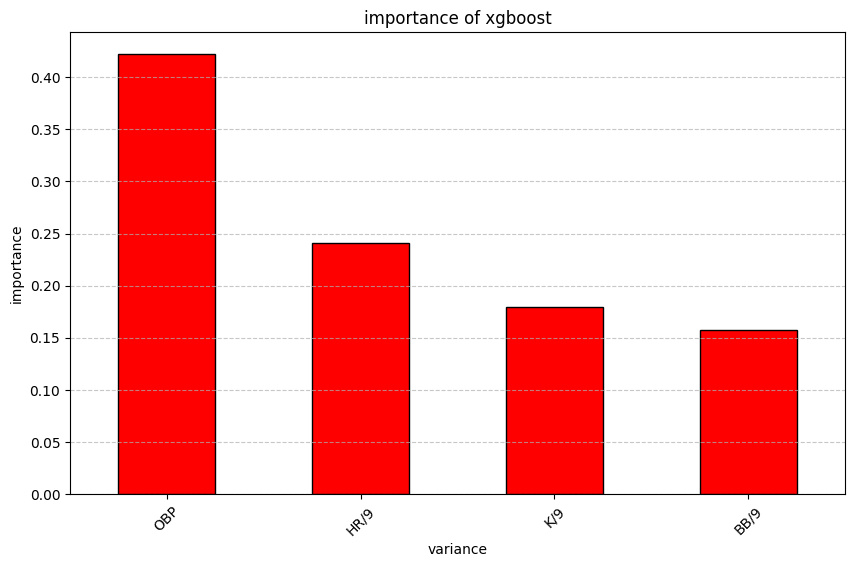

In [266]:
plt.figure(figsize = (10,6))
top3.plot(kind = 'bar', color = 'red', edgecolor = 'black')

plt.title('importance of xgboost')
plt.xlabel('variance')
plt.ylabel('importance')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

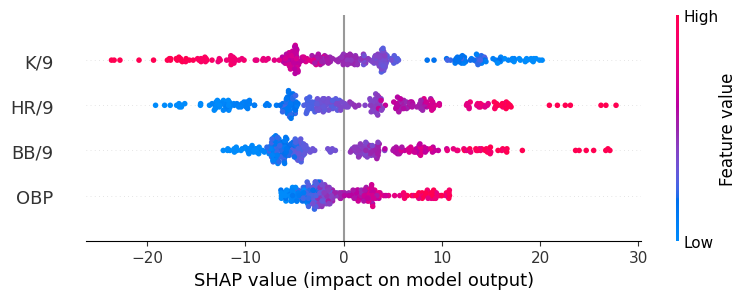

In [267]:
import shap 
# TreeExplainer로 XGBoost 모델 해석 
explainer = shap.Explainer(best_xg_reg) 
shap_values = explainer(X_scaled_all) 
# 전체 변수 영향력 요약 + 방향성 
shap.summary_plot(shap_values, X, feature_names=X.columns)

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math


# 1. 파생 변수 생성
sp_corr['PF_inverse'] = 1 / sp_corr['PPF']

# 2. 독립 변수 및 종속 변수 정의
X = sp_corr[['HR/9', 'OBP', 'BB/9', 'K/9']]
y = sp_corr['FIP-'] 

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled_all = scaler.transform(X)

params = {
    'n_estimators': (100, 250, 500, 750, 1000),
    'max_depth': (3, 6, 9, 12, 15),
    'min_samples_leaf': (5, 10, 15, 20, 25),
    'min_samples_split': (5, 10, 15, 20, 25)
}
# params = {
#     'n_estimators' : (100, 200, 500),
#     'max_depth' : (5,8,10),
#     'min_samples_leaf' : (8,18,25),
#     'min_samples_split' : (8,16,25)
# }

# RandomForest 모델 학습
rf_reg = RandomForestRegressor(random_state = 42, n_jobs = -1)
rf_reg_cv = GridSearchCV(rf_reg, param_grid = params, cv = 2, n_jobs = -1)
rf_reg_cv.fit(X_train, y_train)

# 예측 및 평가
y_pred_rf = rf_reg_cv.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Best parameter : {rf_reg_cv.best_params_}')
print(f'RandomForest MSE: {mse_rf}')

# 예측값 생성 (전체 데이터에 대해 예측)
sp_corr['Predicted_FIP_RF'] = rf_reg_cv.predict(X)
sp_corr['New_randomforest_FIP'] = sp_corr['Predicted_FIP_RF'] * sp_corr['PF_inverse']
# 결과 확인
print("\n### RandomForest 예측 FIP ###")
print(sp_corr[['Name', 'FIP-', 'Predicted_FIP_RF', 'New_randomforest_FIP']])

sp_corr['Normalized_New_randomforest_FIP'] = (
    (sp_corr['New_randomforest_FIP'] - sp_corr['New_randomforest_FIP'].min()) /
    (sp_corr['New_randomforest_FIP'].max() - sp_corr['New_randomforest_FIP'].min())
)

Best parameter : {'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 750}
RandomForest MSE: 75.15613484994549

### RandomForest 예측 FIP ###
     Name    FIP-  Predicted_FIP_RF  New_randomforest_FIP
0      놀린   75.84         73.067743             73.177509
1     양현종   90.92         89.890224             90.025261
2     임기영  119.56        108.419934            108.582808
3     파노니   81.25         75.276949             75.390034
4     이의리  105.11         96.433817             96.578685
...   ...     ...               ...                   ...
1439  한현희   88.79         85.075141             86.608104
1440  브리검  102.85        100.795300            102.611524
1441  최원태  101.08        108.922681            110.885352
1443  정찬헌   87.31         90.620116             92.252994
1459  김정인  145.98        131.073796            133.435606

[308 rows x 4 columns]


In [79]:
print("\n### 정규화된 RandomForest FIP ###")
print(sp_corr[['Name', 'FIP-', 'Predicted_FIP_RF', 'New_randomforest_FIP', 'Normalized_New_randomforest_FIP']])


### 정규화된 RandomForest FIP ###
     Name    FIP-  Predicted_FIP_RF  New_randomforest_FIP  \
0      놀린   75.84         73.067743             73.177509   
1     양현종   90.92         89.890224             90.025261   
2     임기영  119.56        108.419934            108.582808   
3     파노니   81.25         75.276949             75.390034   
4     이의리  105.11         96.433817             96.578685   
...   ...     ...               ...                   ...   
1439  한현희   88.79         85.075141             86.608104   
1440  브리검  102.85        100.795300            102.611524   
1441  최원태  101.08        108.922681            110.885352   
1443  정찬헌   87.31         90.620116             92.252994   
1459  김정인  145.98        131.073796            133.435606   

      Normalized_New_randomforest_FIP  
0                            0.149799  
1                            0.324193  
2                            0.516285  
3                            0.172701  
4                            0.39202

In [80]:
best_rf = rf_reg_cv.best_estimator_
print(best_rf.feature_importances_, '\n')
ser = pd.Series(best_rf.feature_importances_, index = X_train.columns)

top3 = ser.sort_values(ascending = False)[:4]
print(top3)

[0.19804928 0.57975734 0.0671372  0.15505618] 

OBP     0.579757
HR/9    0.198049
K/9     0.155056
BB/9    0.067137
dtype: float64


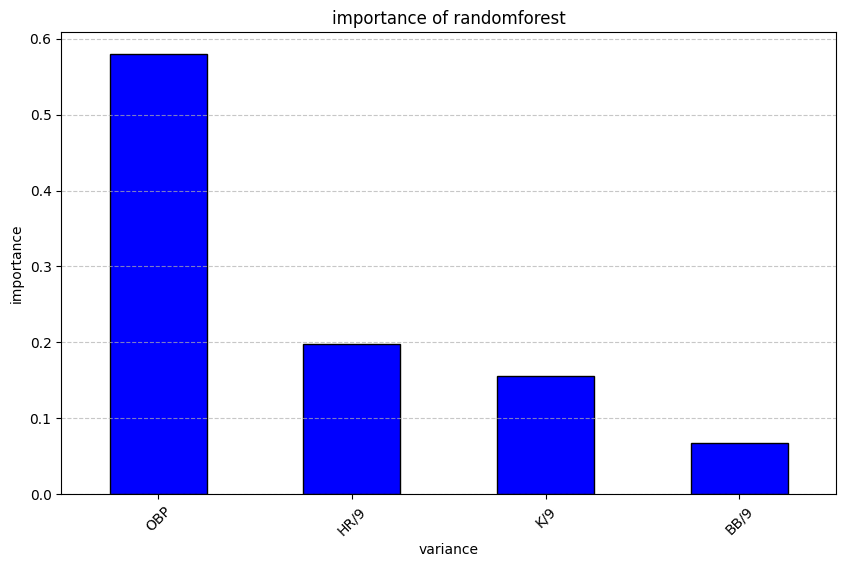

In [81]:
plt.figure(figsize = (10,6))
top3.plot(kind = 'bar', color = 'blue', edgecolor = 'black')

plt.title('importance of randomforest')
plt.xlabel('variance')
plt.ylabel('importance')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

In [82]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

lgb_reg = lgb.LGBMRegressor()

# 1. 파생 변수 생성
sp_corr['PF_inverse'] = 1 / sp_corr['PPF']

# 2. 독립 변수 및 종속 변수 정의
X = sp_corr[['HR/9', 'OBP', 'BB/9', 'K/9']]
y = sp_corr['FIP-']

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled_all = scaler.transform(X)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'num_leaves': [10, 15, 20],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'n_estimators': [800, 1000, 1200]
}

# GridSearchCV를 사용한 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(lgb_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적 모델 가져오기
best_lgb = grid_search.best_estimator_

# 예측 및 평가
y_pred_lgb = best_lgb.predict(X_test)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)

# 결과 출력
print(f'Best Parameters: {grid_search.best_params_}')
print(f'LightGBM MSE: {mse_lgb}')

# Feature Importance 확인
feature_importance = pd.Series(best_lgb.feature_importances_, index=X.columns).sort_values(ascending=False)

# 상위 10개 변수 출력
print("\n### Top 5 Feature Importance ###")
print(feature_importance[:5])

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 246, number of used features: 4
[LightGBM] [Info] Start training from score 97.542033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

In [83]:
sp_corr['Predicted_FIP_gbm'] = best_lgb.predict(X)
sp_corr['New_lightgbm_FIP'] = sp_corr['Predicted_FIP_gbm'] * sp_corr['PF_inverse']

sp_corr['Normalized_New_LightGBM_FIP'] = (
    (sp_corr['New_lightgbm_FIP'] - sp_corr['New_lightgbm_FIP'].min()) /
    (sp_corr['New_lightgbm_FIP'].max() - sp_corr['New_lightgbm_FIP'].min())
)


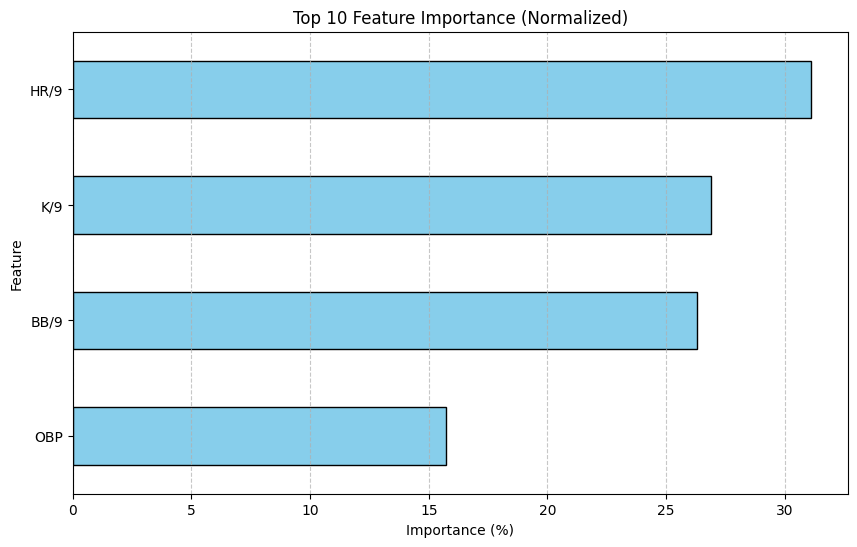

In [84]:
import matplotlib.pyplot as plt

# Feature Importance 비율화 (백분율)
feature_importance_ratio = feature_importance / feature_importance.sum() * 100

# 상위 10개 변수 선택
top_10_features = feature_importance_ratio[:10]

# 시각화
plt.figure(figsize=(10, 6))
top_10_features.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel("Importance (%)")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importance (Normalized)")
plt.gca().invert_yaxis()  # 중요도가 높은 순서대로 정렬
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [85]:
print("\n### LightGBM 예측 FIP ###")
print(sp_corr[['Name', 'FIP-', 'Predicted_FIP_gbm', 'New_lightgbm_FIP', 'Normalized_New_LightGBM_FIP']])


### LightGBM 예측 FIP ###
     Name    FIP-  Predicted_FIP_gbm  New_lightgbm_FIP  \
0      놀린   75.84          71.400627         71.507889   
1     양현종   90.92          90.396634         90.532432   
2     임기영  119.56         112.065285        112.233636   
3     파노니   81.25          76.948786         77.064383   
4     이의리  105.11          99.397663         99.546984   
...   ...     ...                ...               ...   
1439  한현희   88.79          88.100483         89.687960   
1440  브리검  102.85         102.956736        104.811906   
1441  최원태  101.08         109.578938        111.553434   
1443  정찬헌   87.31          89.198413         90.805673   
1459  김정인  145.98         139.982857        142.505199   

      Normalized_New_LightGBM_FIP  
0                        0.154912  
1                        0.337782  
2                        0.546382  
3                        0.208323  
4                        0.424433  
...                           ...  
1439                     0

In [268]:
sp_corr.to_csv("Predict_starter_PPF_newsample_fipplus5.csv", index = False, encoding = "utf-8-sig")
print("done")

done


In [269]:
#another_sp_corr = sp_corr[['FIP-', 'FIP', 'Normalized_New_ridge_FIP', 'Normalized_New_Lasso_FIP', 'Normalized_New_Elastic_FIP', 'Normalized_New_xgboost_FIP','Normalized_New_randomforest_FIP', 'Normalized_New_LightGBM_FIP']]
another_sp_corr = sp_corr[['FIP-', 'FIP', 'Normalized_New_ridge_FIP', 'Normalized_New_Lasso_FIP', 'Normalized_New_Elastic_FIP', 'Normalized_New_xgboost_FIP']]
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import numpy as np

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(another_sp_corr)

# 표준화된 데이터를 다시 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=another_sp_corr.columns)

In [270]:
corr, p_value = pearsonr(scaled_df['FIP'], scaled_df['FIP-'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['FIP'], scaled_df['FIP-']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.936613349481867
P-value: 2.0426688144909552e-141
RMSE: 0.35605238524164645


In [271]:
# R² 계산
from sklearn.metrics import r2_score
r2 = r2_score(scaled_df['FIP'], scaled_df['FIP-'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.8732266989637342


In [272]:
corr, p_value = pearsonr(scaled_df['FIP-'], scaled_df['Normalized_New_ridge_FIP'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['FIP-'], scaled_df['Normalized_New_ridge_FIP']))
print(f"RMSE: {rmse}")

# R² 계산
r2 = r2_score(scaled_df['FIP-'], scaled_df['Normalized_New_ridge_FIP'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9696878725168537
P-value: 2.524172484758644e-189
RMSE: 0.24621993210601809

### 결정계수 (R²) ###
R² Score: 0.9393757450337078


In [273]:
corr, p_value = pearsonr(scaled_df['FIP-'], scaled_df['Normalized_New_Lasso_FIP'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['FIP-'], scaled_df['Normalized_New_Lasso_FIP']))
print(f"RMSE: {rmse}")

# R² 계산
r2 = r2_score(scaled_df['FIP-'], scaled_df['Normalized_New_Lasso_FIP'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9696844401992402
P-value: 2.5676055498952845e-189
RMSE: 0.2462338717591868

### 결정계수 (R²) ###
R² Score: 0.9393688803984803


In [274]:
corr, p_value = pearsonr(scaled_df['FIP-'], scaled_df['Normalized_New_Elastic_FIP'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['FIP-'], scaled_df['Normalized_New_Elastic_FIP']))
print(f"RMSE: {rmse}")

# R² 계산
r2 = r2_score(scaled_df['FIP-'], scaled_df['Normalized_New_Elastic_FIP'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9696846881908314
P-value: 2.5644427002680818e-189
RMSE: 0.2462328646187124

### 결정계수 (R²) ###
R² Score: 0.9393693763816628


In [275]:
corr, p_value = pearsonr(scaled_df['FIP-'], scaled_df['Normalized_New_xgboost_FIP'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['FIP-'], scaled_df['Normalized_New_xgboost_FIP']))
print(f"RMSE: {rmse}")

# R² 계산
r2 = r2_score(scaled_df['FIP-'], scaled_df['Normalized_New_xgboost_FIP'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9735148094431311
P-value: 3.643833029171067e-198
RMSE: 0.23015295156425372

### 결정계수 (R²) ###
R² Score: 0.9470296188862622


In [94]:
corr, p_value = pearsonr(scaled_df['FIP-'], scaled_df['Normalized_New_randomforest_FIP'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['FIP-'], scaled_df['Normalized_New_randomforest_FIP']))
print(f"RMSE: {rmse}")

# R² 계산
r2 = r2_score(scaled_df['FIP-'], scaled_df['Normalized_New_randomforest_FIP'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9550975844317001
P-value: 1.0582230880803968e-163
RMSE: 0.29967454202284094

### 결정계수 (R²) ###
R² Score: 0.9101951688634006


In [95]:
corr, p_value = pearsonr(scaled_df['FIP-'], scaled_df['Normalized_New_LightGBM_FIP'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['FIP-'], scaled_df['Normalized_New_LightGBM_FIP']))
print(f"RMSE: {rmse}")

# R² 계산
r2 = r2_score(scaled_df['FIP-'], scaled_df['Normalized_New_LightGBM_FIP'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9690569374185127
P-value: 5.623206380423829e-188
RMSE: 0.24876922069053195

### 결정계수 (R²) ###
R² Score: 0.9381138748370255
